In [1]:
%matplotlib inline
import math

#USZipCode
#pip install uszipcode
from uszipcode import ZipcodeSearchEngine
search = ZipcodeSearchEngine()

#Pandas Dependecies
import numpy as np
import pandas as pd

#matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#for make legends in world map
import matplotlib.patches as mpatches

#different dimensions of subplots
from matplotlib import gridspec

#BaseMap
#conda install basemap
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon

import scipy.stats as stats

#from collections import defaultdict
#from scipy.stats.stats import pearsonr

In [2]:
#Read CSV and Setup Pandas
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60) 
df = pd.read_csv("dataset/training.csv")
#df.style.apply(highlight_max)

In [3]:
df.dtypes

RefId                                  int64
IsBadBuy                               int64
PurchDate                             object
Auction                               object
VehYear                                int64
VehicleAge                             int64
Make                                  object
Model                                 object
Trim                                  object
SubModel                              object
Color                                 object
Transmission                          object
WheelTypeID                          float64
WheelType                             object
VehOdo                                 int64
Nationality                           object
Size                                  object
TopThreeAmericanName                  object
MMRAcquisitionAuctionAveragePrice    float64
MMRAcquisitionAuctionCleanPrice      float64
MMRAcquisitionRetailAveragePrice     float64
MMRAcquisitonRetailCleanPrice        float64
MMRCurrent

Trim                                  2360
SubModel                                 8
Color                                    8
Transmission                             9
WheelType                             3174
Nationality                              5
Size                                     5
TopThreeAmericanName                     5
MMRAcquisitionAuctionAveragePrice       18
MMRAcquisitionAuctionCleanPrice         18
MMRAcquisitionRetailAveragePrice        18
MMRAcquisitonRetailCleanPrice           18
MMRCurrentAuctionAveragePrice          315
MMRCurrentAuctionCleanPrice            315
MMRCurrentRetailAveragePrice           315
MMRCurrentRetailCleanPrice             315
PRIMEUNIT                            69564
AUCGUART                             69564
dtype: int64


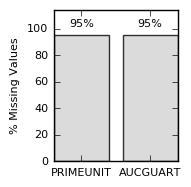

In [4]:
# Missing values Distribution

dfTemp = df.drop(['RefId','IsBadBuy','PurchDate','Auction','VehYear','VehicleAge','Make','WheelTypeID',
                  'Model','VehOdo','BYRNO','VNZIP1','VNST','VehBCost','IsOnlineSale','WarrantyCost'],axis=1)
print dfTemp.isnull().sum()

total_rows = len(df)

# Plot Dimension
plt.figure(figsize=(2,2))
ax1 = plt.subplot(111)

# text on bars top
def autolabel(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height)+'%',
                ha='center', va='bottom',fontsize=8)

# SubPlot 1 - Missing Values Distribution (only PRIMEUNIT and AUCGUART)
#dfTemp = df.drop(['PRIMEUNIT','AUCGUART'],axis=1)

dfTemp = pd.concat([df['PRIMEUNIT'],df['AUCGUART']],axis=1)
attributes = dfTemp.columns.values
missing_values = dfTemp.isnull().sum().tolist()

nPercentageMissingValues = []
for miss in missing_values:
    nPercentageMissingValues.append(round((float(miss) / float(total_rows)) * 100, 4))
    
index_x_1 = np.arange(len(attributes))
bar_width_1 = 0.8
opacity_1 = 0.8

# Good Buy Bar
rects1 = ax1.bar(
    index_x_1, 
    nPercentageMissingValues, 
    bar_width_1,
    alpha=opacity_1,
    color='lightgrey',
    label='Missing Values')

#ax1.set_xlabel('Dataset Attributes',fontsize=8)
ax1.set_ylabel('% Missing Values',fontsize=8)
#ax1.set_title('Missing Values Distribution (PRIMEUNIT and AUCGUART)',fontsize=8)
ax1.set_xticks(index_x_1+(bar_width_1/2))
ax1.set_xticklabels(attributes)
ax1.set_ylim([0, (np.amax(nPercentageMissingValues))* 1.2])
ax1.tick_params(axis='x', labelsize=8)
ax1.tick_params(axis='y', labelsize=8)
#ax1.set_axis_bgcolor('lightgrey')

autolabel(rects1,ax1)

plt.tight_layout()

# Save plot image
plt.savefig('saved_plots/plots_miss_values_primeunit_aucguart.png')

plt.show()

In [26]:
dftmp = pd.concat([df['Make'],df['Nationality']],axis=1)
print dftmp[dftmp['Nationality'].isnull()]
print "\n"
print dftmp[dftmp['Make'].str.contains('JEEP')][:5]

          Make Nationality
10888      GMC         NaN
25169    DODGE         NaN
37986  HYUNDAI         NaN
69948     JEEP         NaN
69958     JEEP         NaN


     Make Nationality
71   JEEP    AMERICAN
78   JEEP    AMERICAN
123  JEEP    AMERICAN
135  JEEP    AMERICAN
273  JEEP    AMERICAN


In [17]:
print df['Transmission'].value_counts()

AUTO      70398
MANUAL     2575
Manual        1
Name: Transmission, dtype: int64


In [18]:
dftmp = pd.concat([df['Make'],df['Model'],df['Size']],axis=1)
print dftmp[dftmp['Size'].isnull()]
print '\n'
print dftmp[dftmp['Model'].str.contains('SIERRA')][:10]

          Make                Model Size
10888      GMC          SIERRA 1500  NaN
25169    DODGE         NITRO 4WD V6  NaN
37986  HYUNDAI  ELANTRA 2.0L I4 MPI  NaN
69948     JEEP       PATRIOT 2WD 4C  NaN
69958     JEEP       PATRIOT 2WD 4C  NaN


     Make                 Model         Size
10    GMC  1500 SIERRA PICKUP 2  LARGE TRUCK
596   GMC  1500 SIERRA PICKUP 2  LARGE TRUCK
687   GMC  1500 SIERRA PICKUP 2  LARGE TRUCK
1265  GMC  1500 SIERRA PICKUP 2  LARGE TRUCK
2497  GMC  1500 SIERRA PICKUP 4  LARGE TRUCK
3180  GMC  1500 SIERRA PICKUP 2  LARGE TRUCK
3263  GMC  1500 SIERRA PICKUP 2  LARGE TRUCK
3798  GMC  1500 SIERRA PICKUP 2  LARGE TRUCK
4633  GMC  1500 SIERRA PICKUP 2  LARGE TRUCK
4736  GMC  1500 SIERRA PICKUP 2  LARGE TRUCK


In [4]:
# Missing Values Replacement
print "# # # # # # # # # # # # # # #\n"
print "Check Missing Values pre-replacement\n"
print df.isnull().sum()

# Replacement Missing Values with NS
df.replace({'Trim' : { np.nan : 'NS'}}, inplace=True)
df.replace({'SubModel' : { np.nan : 'NS'}}, inplace=True)
df.replace({'Color' : { np.nan : 'NS'}}, inplace=True)
df.replace({'Transmission' : { np.nan : 'NS'}}, inplace=True)
df.replace({'WheelTypeID' : { np.nan : 'NS'}}, inplace=True)
df.replace({'WheelType' : { np.nan : 'NS'}}, inplace=True)
df.replace({'Nationality' : { np.nan : 'NS'}}, inplace=True)
df.replace({'Size' : { np.nan : 'NS'}}, inplace=True)
df.replace({'TopThreeAmericanName' : { np.nan : 'NS'}}, inplace=True)
df.replace({'MMRAcquisitionAuctionAveragePrice' : { np.nan : 'NS'}}, inplace=True)
df.replace({'MMRAcquisitionAuctionCleanPrice' : { np.nan : 'NS'}}, inplace=True)
df.replace({'MMRAcquisitionRetailAveragePrice' : { np.nan : 'NS'}}, inplace=True)
df.replace({'MMRAcquisitonRetailCleanPrice' : { np.nan : 'NS'}}, inplace=True)
df.replace({'MMRCurrentAuctionAveragePrice' : { np.nan : 'NS'}}, inplace=True)
df.replace({'MMRCurrentAuctionCleanPrice' : { np.nan : 'NS'}}, inplace=True)
df.replace({'MMRCurrentRetailAveragePrice' : { np.nan : 'NS'}}, inplace=True)
df.replace({'MMRCurrentRetailCleanPrice' : { np.nan : 'NS'}}, inplace=True)
df.replace({'PRIMEUNIT' : { np.nan : 'NS'}}, inplace=True)
df.replace({'AUCGUART' : { np.nan : 'NS'}}, inplace=True)

print "\nCheck Missing Values post-replacement\n"
print df.isnull().sum()
print "# # # # # # # # # # # # # # #\n"

# Resolve Ambiguity of some attributes

# Transmission => 'Manual' and 'MANUAL'
print "# # # # # # # # # # # # # # #\n"
print "Transmission Ambiguity\n"
print df['Transmission'].unique()

df['Transmission'] = df['Transmission'].str.upper()

print "\n", df['Transmission'].unique()
print "\nResolve ambiguities done\n"
print "# # # # # # # # # # # # # # #\n"

# Drop Vehicle Year because is redundant with Vehicle Age
print "# # # # # # # # # # # # # # #\n"
print "Redundant Attributes\n"
print "Vehicle Age\n", sorted(df['VehicleAge'].unique())
print "Vehicle Year\n", sorted(df['VehYear'].unique())

df = df.drop('VehYear',axis=1)

print "\nVehicle Year is redundant, dropped\n"

print "WheelTypeID\n", sorted(df['WheelTypeID'].unique())

df = df.drop('WheelTypeID', axis=1)

print "WheelTypeID is redudant, dropped\n"

print "# # # # # # # # # # # # # # #\n"

# Replace NS Nationality for Manufactures with the appropriate nationality
# DODGE => AMERICAN
# GMC => AMERICAN
# JEEP => AMERICAN
# HYUNDAI => OTHER ASIAN

print "# # # # # # # # # # # # # # #\n"
print "Replace NS Nationality with appropriate nationality based on Make\n"

# Replace DODGE
df.ix[(df.Make == 'DODGE') & (df.Nationality == 'NS'),'Nationality'] = 'AMERICAN'
# Replace GMC
df.ix[(df.Make == 'GMC') & (df.Nationality == 'NS'),'Nationality'] = 'AMERICAN'
# Replace JEEP
df.ix[(df.Make == 'JEEP') & (df.Nationality == 'NS'),'Nationality'] = 'AMERICAN'
# Replace HYNDAI
df.ix[(df.Make == 'HYUNDAI') & (df.Nationality == 'NS'),'Nationality'] = 'OTHER ASIAN'

print "Nationalities replacement done!\n"
print "Check if there are NS nationalities...\n"

if df[df['Nationality'] == 'NS'].empty:
    print "All NS nationalities are replaced!\n"
else:
    print "There are NS nationalities need to be replaced!\n"
    
print "# # # # # # # # # # # # # # #\n"

# Replace NS Sizes for Model with the appropriate Size

print "# # # # # # # # # # # # # # #\n"
print "Replace NS Sizes with appropriate size based on Make and Model\n"

# GMC SIERRA => LARGE TRUCK
df.ix[(df.Make == 'GMC') & (df['Model'].str.contains('SIERRA')),'Size'] = 'LARGE TRUCK'

# DODGE NITRO => MEDIUM SUV
df.ix[(df.Make == 'DODGE') & (df['Model'].str.contains('NITRO')),'Size'] = 'MEDIUM SUV'

# HYUNDAI ELANTRA => MEDIUM
df.ix[(df.Make == 'HYUNDAI') & (df['Model'].str.contains('ELANTRA')),'Size'] = 'MEDIUM'

# JEEP PATRIOT => SMALL SUV
df.ix[(df.Make == 'JEEP') & (df['Model'].str.contains('PATRIOT')),'Size'] = 'SMALL SUV'

print "Sizes replacement done!\n"
print "Check if there are NS Sizes\n"

if df[df['Size'] == 'NS'].empty:
    print "All NS sizes are replaced!\n"
else:
    print "There are NS sizes need to be replaced!\n"

print "# # # # # # # # # # # # # # #\n"

# Replace NS Transmission

print "# # # # # # # # # # # # # # #\n"

# MERCURY(Make) MONTEGO(Model) 4D SEDAN(SubModel) => Automatic Transmission

# DODGE(Make) STRATUS(Model) => Automatic Transmission

# CHEVROLET(Make) S10 PICKUP 2WD 4C(Model) => Automatic Transmission

# CHEVROLET(Make) IMPALA V6 SFI(Model) => Automatic Transmission

# PONTIAC(Make) GRAND AM 3.4L(Model) SE(Trim) => Automatic Transmission

# CHEVROLET(Make) CAVALIER(Model) Bas(Trim) => Automatic Transmission

# MERCURY MONTAINEER => 

# FORD FREESTAR =>

print df.isnull().sum()

# # # # # # # # # # # # # # #

Check Missing Values pre-replacement

RefId                                    0
IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  2360
SubModel                                 8
Color                                    8
Transmission                             9
WheelTypeID                           3169
WheelType                             3174
VehOdo                                   0
Nationality                              5
Size                                     5
TopThreeAmericanName                     5
MMRAcquisitionAuctionAveragePrice       18
MMRAcquisitionAuctionCleanPrice         18
MMRAcquisitionRetailAveragePrice        18
MMRAcquisitonRetailCleanPric

In [58]:
from pandas.tools.plotting import scatter_matrix

In [62]:
dfScatter = pd.concat([df['IsBadBuy'],df['VehicleAge'],df['VehOdo'],df['WarrantyCost']],axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000021E326D8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000029EC1D68>]], dtype=object)

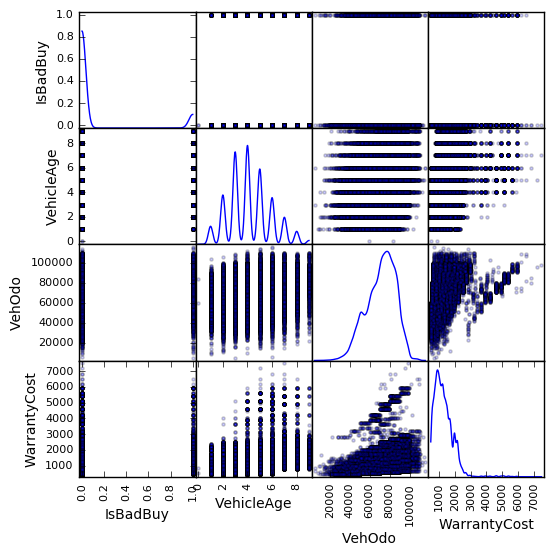

In [63]:
scatter_matrix(dfScatter, alpha=0.2, figsize=(6, 6), diagonal='kde')

In [20]:
# Attributes Arrays and Samples

# RefId not considered
# IsBadBuy not considered
# PurchDate dropped
auctions = sorted(df['Auction'].unique())
# VehYear dropped
vehicleAges = sorted(df['VehicleAge'].unique())
makes = sorted(df['Make'].unique())
models = sorted(df['Model'].unique())
trims = sorted(df['Trim'].unique())
subModels = sorted(df['SubModel'].unique())
colors = sorted(df['Color'].unique())
transmissions = sorted(df['Transmission'].unique())
# WheelTypeID dropped
wheeltypes = sorted(df['WheelType'].unique())
vehOdos = sorted(df['VehOdo'].unique())
nationalities = sorted(df['Nationality'].unique())
sizes = sorted(df['Size'].unique())
# TopThreeAmericanName dropped
# MMRAcquisitionAuctionAveragePrice not considered
# MMRAcquisitionAuctionCleanPrice not considered
# MMRAcquisitionRetailAveragePrice not considered
# MMRAcquisitonRetailCleanPrice not considered
# MMRCurrentAuctionAveragePrice not considered
# MMRCurrentAuctionCleanPrice not considered
# MMRCurrentRetailAveragePrice not considered
# MMRCurrentRetailCleanPrice not considered
demands = sorted(df['PRIMEUNIT'].unique())
guarantees = sorted(df['AUCGUART'].unique())
# BYRNO dropped 
zipcodes = sorted(df['VNZIP1'].unique())    #VNZIP1
states = sorted(df['VNST'].unique())        #VNST
vehcosts = sorted(df['VehBCost'].unique())
onlinesales = sorted(df['IsOnlineSale'].unique())
warranties = sorted(df['WarrantyCost'].unique())

# Samples
print "Sample of sorted unique rows for each attribute\n"
print auctions[:5],"\n",vehicleAges[:5],"\n",makes[:5],"\n",models[:5],"\n",trims[:5],"\n",subModels[:5],"\n",colors[:5],"\n",transmissions[:5],"\n",\
    wheeltypes[:5],"\n",vehOdos[:5],"\n",nationalities[:5],"\n",sizes[:5],"\n",demands[:5],"\n",guarantees[:5],"\n",zipcodes[:5],"\n",states[:5],"\n", \
    vehcosts[:5],"\n",onlinesales[:5],"\n",warranties[:5],"\n"

Sample of sorted unique rows for each attribute

['ADESA', 'MANHEIM', 'OTHER'] 
[0, 1, 2, 3, 4] 
['ACURA', 'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER'] 
['1500 RAM PICKUP 2WD', '1500 RAM PICKUP 4WD', '1500 SIERRA PICKUP 2', '1500 SIERRA PICKUP 4', '1500 SILVERADO PICKU'] 
['1', '150', '2', '250', '3'] 
['2D CONVERTIBLE', '2D CONVERTIBLE DREAM CRUISER', '2D CONVERTIBLE GL', '2D CONVERTIBLE GLS', '2D CONVERTIBLE GT'] 
['BEIGE', 'BLACK', 'BLUE', 'BROWN', 'GOLD'] 
['AUTO', 'MANUAL', 'NS'] 
['Alloy', 'Covers', 'NS', 'Special'] 
[4825, 5368, 8706, 9446, 9878] 
['AMERICAN', 'OTHER', 'OTHER ASIAN', 'TOP LINE ASIAN'] 
['COMPACT', 'CROSSOVER', 'LARGE', 'LARGE SUV', 'LARGE TRUCK'] 
['NO', 'NS', 'YES'] 
['GREEN', 'NS', 'RED'] 
[2764, 3106, 8505, 12552, 16066] 
['AL', 'AR', 'AZ', 'CA', 'CO'] 
[1.0, 225.0, 1400.0, 1620.0, 1720.0] 
[0, 1] 
[462, 482, 505, 522, 533] 



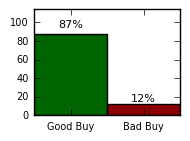

In [264]:
# Good/Bad Buy Distribution (%)

nGoodBuy = len(df[df['IsBadBuy']==0])
nBadBuy = len(df[df['IsBadBuy']==1])
total = len(df['IsBadBuy'])

nPercentageGoodBuy = round((float(nGoodBuy) / float(total)) * 100, 2)
nPercentageBadBuy = round((float(nBadBuy) / float(total)) * 100, 2)

attributes = ['Good Buy', 'Bad Buy']

# Plot Dimension
plt.figure(figsize=(2,1.5))
ax1 = plt.subplot(111)

# text on bars top
def autolabel(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height)+'%',
                ha='center', va='bottom',fontsize=8)

index_x_1 = np.arange(1)
bar_width_1 = 1
opacity_1 = 1

# Good Buy Bar
rects1 = ax1.bar(
    index_x_1, 
    nPercentageGoodBuy, 
    bar_width_1,
    alpha=opacity_1,
    color='darkgreen')

# Bad Buy Bar
rects2 = ax1.bar(
    index_x_1+bar_width_1,
    nPercentageBadBuy,
    bar_width_1,
    alpha=opacity_1,
    color='darkred')

#ax1.set_xlabel('',fontsize=10)
#ax1.set_ylabel('%',fontsize=10)
#ax1.set_title('Purchases for Auction House',fontsize=12)
ax1.set_xticks(np.arange(0.5,2))
ax1.set_xticklabels(attributes)
ax1.set_ylim([0, (np.amax(nPercentageGoodBuy))* 1.3])
ax1.tick_params(axis='x', labelsize=7)
ax1.tick_params(axis='y', labelsize=7)
#ax1.legend((rects1[0], rects2[0]), ('Good Buy', 'Bad Buy'), fontsize=8)
#ax1.set_axis_bgcolor('lightgrey')

autolabel(rects1,ax1)
autolabel(rects2,ax1)

plt.tight_layout()

# Save plot image
plt.savefig('saved_plots/plots_isbadbuy_distribution.png')

plt.show()

## Purchase Dates Analysis (Purchases between 2009 and 2010)

# 2009
purchDate2009 = df[df['PurchDate'].str.contains('2009')]
xtabPurchDate2009BadBuy = pd.crosstab(df['PurchDate'].str.contains('2009'), df['IsBadBuy'])
nBadBuy2009 = xtabPurchDate2009BadBuy[1][1]
nGoodBuy2009 = xtabPurchDate2009BadBuy[0][1]

# 2010
purchDate2010 = df[df['PurchDate'].str.contains('2010')]
xtabPurchDate2010BadBuy = pd.crosstab(df['PurchDate'].str.contains('2010'), df['IsBadBuy'])
nBadBuy2010 = xtabPurchDate2010BadBuy[1][1]
nGoodBuy2010 = xtabPurchDate2009BadBuy[0][1]

# % Bad Buy
percentageBadBuysYears = []

totalBuys2009 = nBadBuy2009 + nGoodBuy2009
percentageBadBuysYears.append(round((float(nBadBuy2009) / float(totalBuys2009)) * 100, 2))

totalBuys2010 = nBadBuy2010 + nGoodBuy2010
percentageBadBuysYears.append(round((float(nBadBuy2010) / float(totalBuys2010)) * 100, 2))

# for every month of a year in 'PurchDate' attribute, extract the number of bad buys
nMonths = 12
# Bad Buys for month in 2009
nBadBuyMonths2009 = []

for i in range(1,nMonths+1):
    month = "/" + str(i) + "/2009"
    xtab = pd.crosstab(df['PurchDate'].str.contains(month), df['IsBadBuy'])
    nBadBuyMonths2009.append(xtab[1][1])

# Bad Buys for month in 2010
nBadBuyMonths2010 = []

for i in range(1,nMonths+1):
    month = "/" + str(i) + "/2010"
    xtab = pd.crosstab(df['PurchDate'].str.contains(month), df['IsBadBuy'])
    nBadBuyMonths2010.append(xtab[1][1])
    


# Plot Dimension
fig = plt.figure(figsize=(10,5))
gs = gridspec.GridSpec(2, 2, width_ratios=[4, 1])   #width_ratios=[1, 1]
ax1 = fig.add_subplot(gs[1])
ax2 = fig.add_subplot(gs[0])
ax3 = fig.add_subplot(gs[2])
ax4 = fig.add_subplot(gs[3])

# text on bars top
def autolabel(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom',fontsize=8)

# SubPlot 1 - Kicks for year
yearsLabels = ['2009','2010']
nBadBuysYears = [nBadBuy2009, nBadBuy2010]

index_x_1 = np.arange(len(nBadBuysYears))        # Axis X : interval
bar_width_1 = 0.8                                # Bars Axis X dimension : value + bar_width 
opacity_1 = 1

rects1 = ax1.bar(index_x_1, 
        nBadBuysYears, 
        bar_width_1,
        alpha=opacity_1,
        color='darkred',
        label='Bad Buy')

ax1.set_xlabel('Years', fontsize=10)
ax1.set_ylabel('Bad Buys', fontsize=10)
ax1.set_title('Kicks for year', fontsize=12)
ax1.set_xticks(index_x_1+(bar_width_1/2))
ax1.set_xticklabels(yearsLabels)
ax1.set_ylim([0, (np.amax(nBadBuysYears))* 1.2])
ax1.tick_params(axis='x', labelsize=10)
ax1.tick_params(axis='y', labelsize=10)

autolabel(rects1,ax1)

# SubPlot 2 - % Kicks for year
index_x_4 = np.arange(len(percentageBadBuysYears))
bar_width_4 = 0.8
opacity_4 = 1

rects1 = ax4.bar(index_x_4, 
        percentageBadBuysYears, 
        bar_width_4,
        alpha=opacity_4,
        color='darksalmon',
        label='% Bad Buy')

ax4.set_xlabel('Years', fontsize=10)
ax4.set_ylabel('% Bad Buys', fontsize=10)
ax4.set_title('% Kicks for year', fontsize=12)
ax4.set_xticks(index_x_4+(bar_width_4/2))
ax4.set_xticklabels(yearsLabels)
ax4.set_ylim([0, (np.amax(percentageBadBuysYears))* 1.2])
ax4.tick_params(axis='x', labelsize=10)
ax4.tick_params(axis='y', labelsize=10)

autolabel(rects1,ax4)

# SubPlot 2 - Kicks for month in 2009
monthsLabels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

index_x_2 = np.arange(len(nBadBuyMonths2009))
index_y_2 = np.arange((np.amax(nBadBuyMonths2009)))
bar_width_2 = 0.8
opacity_2 = 1

rects1 = ax2.bar(index_x_2, 
        nBadBuyMonths2009, 
        bar_width_2,
        alpha=opacity_2,
        color='darkorange',
        label='Bad Buy')

ax2.set_xlabel('Months', fontsize=10)
ax2.set_ylabel('Bad Buys', fontsize=10)
ax2.set_title('Kicks for month in 2009', fontsize=12)
ax2.set_xticks(index_x_2+(bar_width_2/2))
ax2.set_xticklabels(monthsLabels)
ax2.set_ylim([0, (np.amax(nBadBuyMonths2009))* 1.2])
ax2.tick_params(axis='x', labelsize=10)
ax2.tick_params(axis='y', labelsize=10)

autolabel(rects1,ax2)

# SubPlot 3 - Kicks for month in 2010
index_x_3 = np.arange(len(nBadBuyMonths2010))
index_y_3 = np.arange((np.amax(nBadBuyMonths2010)))
bar_width_3 = 0.8
opacity_3 = 1

rects1 = ax3.bar(index_x_3, 
        nBadBuyMonths2010, 
        bar_width_3,
        alpha=opacity_3,
        color='orangered',
        label='Bad Buy')

ax3.set_xlabel('Months', fontsize=10)
ax3.set_ylabel('Bad Buys', fontsize=10)
ax3.set_title('Kicks for month in 2010',fontsize=12)
ax3.set_xticks(index_x_3+(bar_width_3/2))
ax3.set_xticklabels(monthsLabels)
ax3.set_ylim([0, (np.amax(nBadBuyMonths2010))* 1.2])
ax3.tick_params(axis='x', labelsize=10)
ax3.tick_params(axis='y', labelsize=10)

autolabel(rects1,ax3)

plt.tight_layout()

# Save plot image
plt.savefig('saved_plots/plots_kicks_years_months.png')

plt.show()

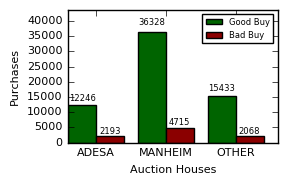

In [266]:
# Auction Houses Analysis (Reliability)

# Plot Dimension
plt.figure(figsize=(3,2))
ax1 = plt.subplot(111)

# text on bars top
def autolabel(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom',fontsize=6)
        
# SubPlot 1 - Kicks for Auction House
auctions = sorted(df['Auction'].unique())
xtabAuctionsGoodBadBuy = pd.crosstab(df['Auction'], df['IsBadBuy'])
nBadBuysAuctions = xtabAuctionsGoodBadBuy[1][:].tolist()
nGoodBuysAuctions = xtabAuctionsGoodBadBuy[0][:].tolist()

index_x_1 = np.arange(len(auctions))
bar_width_1 = 0.4
opacity_1 = 1

# Good Buy Bar
rects1 = ax1.bar(
    index_x_1, 
    nGoodBuysAuctions, 
    bar_width_1,
    alpha=opacity_1,
    color='darkgreen',
    label='Good Buy')

# Bad Buy Bar
rects2 = ax1.bar(
    index_x_1+bar_width_1,
    nBadBuysAuctions,
    bar_width_1,
    alpha=opacity_1,
    color='darkred',
    label='Bad Buy')

ax1.set_xlabel('Auction Houses',fontsize=8)
ax1.set_ylabel('Purchases',fontsize=8)
#ax1.set_title('Purchases for Auction House',fontsize=12)
ax1.set_xticks(index_x_1+bar_width_1)
ax1.set_xticklabels(auctions)
ax1.set_ylim([0, (np.amax(nGoodBuysAuctions))* 1.2])
ax1.tick_params(axis='x', labelsize=8)
ax1.tick_params(axis='y', labelsize=8)
ax1.legend((rects1[0], rects2[0]), ('Good Buy', 'Bad Buy'), fontsize=6)
#ax1.set_axis_bgcolor('lightgrey')

autolabel(rects1,ax1)
autolabel(rects2,ax1)
    
# Plot Show
plt.tight_layout()

# Save plot image
plt.savefig('saved_plots/plots_auction_houses_part1.png')

plt.show()

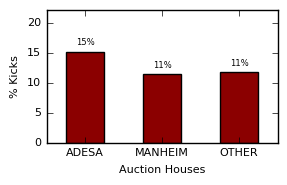

In [267]:
# Plot Dimension
plt.figure(figsize=(3,2))
ax2 = plt.subplot(111)
        
# text on bars top (%)
def autolabel_percentage(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height)+'%',
                ha='center', va='bottom',fontsize=6)


# SubPlot 2 - % Kick for Auction House

# % Bad Buy
nPercentageAuctionsBadBuys = []
nPercentageAuctionsGoodBuy = []
for (good, bad) in zip(nGoodBuysAuctions, nBadBuysAuctions):
    totalBuy = good + bad
    nPercentageAuctionsGoodBuy.append(round((float(good) / float(totalBuy)) * 100, 2))
    nPercentageAuctionsBadBuys.append(round((float(bad) / float(totalBuy)) * 100, 2))
    
index_x_2 = np.arange(len(auctions))
bar_width_2 = 0.5
opacity_2 = 1

# Bad Buy Bar
rects1 = ax2.bar(
    index_x_2+(bar_width_2/2),
    nPercentageAuctionsBadBuys,
    bar_width_2,
    alpha=opacity_2,
    color='darkred',
    label='% Bad Buy')

ax2.set_xlabel('Auction Houses',fontsize=8)
ax2.set_ylabel('% Kicks',fontsize=8)
#ax2.set_title('% Kicks for Auction House',fontsize=12)
ax2.set_xticks(index_x_2+bar_width_2)
ax2.set_xticklabels(auctions)
ax2.set_ylim([0, (np.amax(nPercentageAuctionsGoodBuy))* 0.25])
ax2.tick_params(axis='x', labelsize=8)
ax2.tick_params(axis='y', labelsize=8)
#ax1.set_axis_bgcolor('lightgrey')

autolabel_percentage(rects1,ax2)
    
# Plot Show
plt.tight_layout()

# Save plot image
plt.savefig('saved_plots/plots_auction_houses_part2.png')

plt.show()

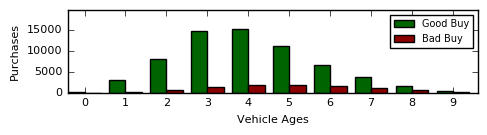

In [19]:
# Vehicle Age Analysis

#fig = plt.figure(figsize=(13,4))
#gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1])   #width_ratios=[1, 1]
#ax1 = fig.add_subplot(gs[0])
#ax2 = fig.add_subplot(gs[1])

# Plot Dimension
plt.figure(figsize=(5,1.5))
ax1 = plt.subplot(111)

# text on bars top
def autolabel(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom',fontsize=5)

# SubPlot 1 - Kicks for Vehicle Age
ages = sorted(df['VehicleAge'].unique())
xtabAgesGoodBadBuy = pd.crosstab(df['VehicleAge'], df['IsBadBuy'])
nBadBuysAges = xtabAgesGoodBadBuy[1][:].tolist()
nGoodBuysAges = xtabAgesGoodBadBuy[0][:].tolist()

index_x_1 = np.arange(len(ages))
bar_width_1 = 0.4
opacity_1 = 1

# Good Buy Bar
rects1 = ax1.bar(
    index_x_1, 
    nGoodBuysAges, 
    bar_width_1,
    alpha=opacity_1,
    color='darkgreen',
    label='Good Buy')

# Bad Buy Bar
rects2 = ax1.bar(
    index_x_1+bar_width_1,
    nBadBuysAges,
    bar_width_1,
    alpha=opacity_1,
    color='darkred',
    label='Bad Buy')

ax1.set_xlabel('Vehicle Ages',fontsize=8)
ax1.set_ylabel('Purchases',fontsize=8)
#ax1.set_title('Purchases for Vehicle Age',fontsize=12)
ax1.set_xticks(index_x_1+bar_width_1)
ax1.set_xticklabels(ages)
ax1.set_ylim([0, (np.amax(nGoodBuysAges))* 1.3])
ax1.tick_params(axis='x', labelsize=8)
ax1.tick_params(axis='y', labelsize=8)
ax1.legend((rects1[0], rects2[0]), ('Good Buy', 'Bad Buy'), fontsize=7)
#ax1.set_axis_bgcolor('lightgrey')

#autolabel(rects1,ax1)
#autolabel(rects2,ax1)

# Plot Show
plt.tight_layout()

# Save plot image
plt.savefig('saved_plots/plots_vehicle_age_part1.png')

plt.show()

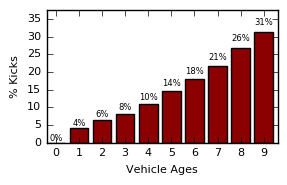

In [93]:
# Plot Dimension
plt.figure(figsize=(3,2))
ax2 = plt.subplot(111)

# text on bars top
def autolabel(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height)+'%',
                ha='center', va='bottom',fontsize=6)

# SubPlot 2 - % Kick for Vehicle Age

# % Bad Buy
nPercentageAgesBadBuys = []
nPercentageAgesGoodBuy = []
for (good, bad) in zip(nGoodBuysAges, nBadBuysAges):
    totalBuy = good + bad
    nPercentageAgesGoodBuy.append(round((float(good) / float(totalBuy)) * 100, 2))
    nPercentageAgesBadBuys.append(round((float(bad) / float(totalBuy)) * 100, 2))
    
index_x_2 = np.arange(len(ages))
bar_width_2 = 0.8
opacity_2 = 1

# Bad Buy Bar
rects1 = ax2.bar(
    index_x_2, 
    nPercentageAgesBadBuys, 
    bar_width_2,
    alpha=opacity_2,
    color='darkred',
    label='% Bad Buy')

ax2.set_xlabel('Vehicle Ages',fontsize=8)
ax2.set_ylabel('% Kicks',fontsize=8)
#ax2.set_title('% Kicks for Vehicle Age',fontsize=12)
ax2.set_xticks(index_x_2+(bar_width_2/2))
ax2.set_xticklabels(ages)
ax2.set_ylim([0, (np.amax(nPercentageAgesBadBuys))* 1.2])
ax2.tick_params(axis='x', labelsize=8)
ax2.tick_params(axis='y', labelsize=8)
#ax2.set_axis_bgcolor('lightgrey')

autolabel(rects1,ax2)

# Plot Show
plt.tight_layout()

# Save plot image
plt.savefig('saved_plots/plots_vehicle_age_part2.png')

plt.show()

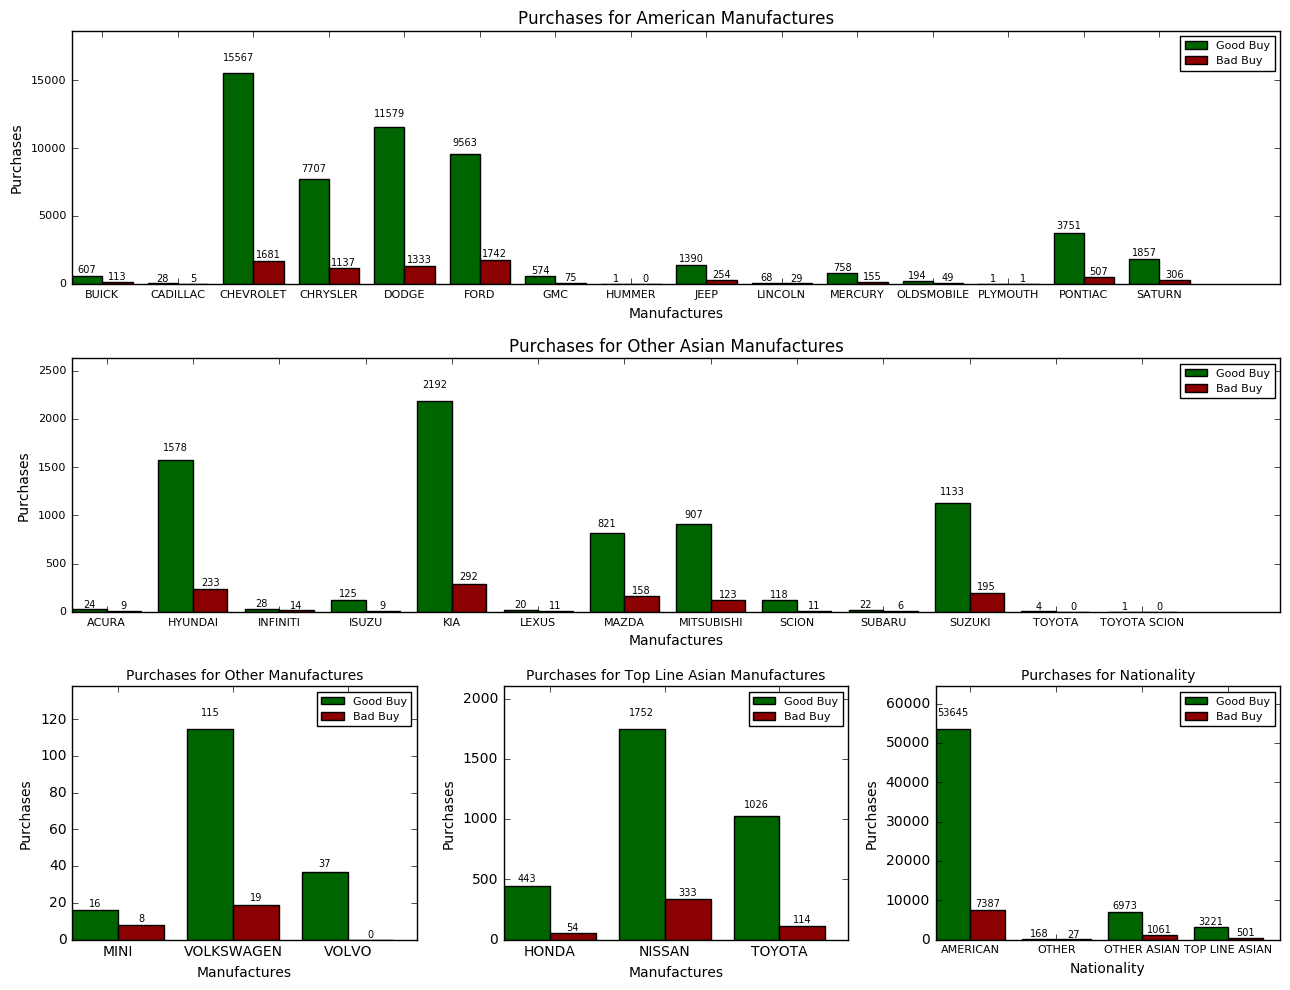

In [13]:
# Manufactures and Nationality Analysis

# Plot Settings
fig = plt.figure(figsize=(13,10))
ax2 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax4 = plt.subplot2grid((3,3), (1,0), colspan=3)
ax3 = plt.subplot2grid((3,3), (2, 0))
ax5 = plt.subplot2grid((3,3), (2, 1))
ax1 = plt.subplot2grid((3,3), (2, 2))

# text on bars top
def autolabel(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom',fontsize=7)

# SubPlot 1 - Good and Bad Buys for Nationality
nationalities = sorted(df['Nationality'].unique())
xtabNationalitiesGoodBadBuy = pd.crosstab(df['Nationality'], df['IsBadBuy'])
nBadBuysNationalities = xtabNationalitiesGoodBadBuy[1][:].tolist()
nGoodBuysNationalities = xtabNationalitiesGoodBadBuy[0][:].tolist()

index_x_1 = np.arange(len(nationalities))
bar_width_1 = 0.4
opacity_1 = 1

# Good Buy Bar
rects1 = ax1.bar(
    index_x_1, 
    nGoodBuysNationalities, 
    bar_width_1,
    alpha=opacity_1,
    color='darkgreen',
    label='Good Buy')

# Bad Buy Bar
rects2 = ax1.bar(
    index_x_1+bar_width_1,
    nBadBuysNationalities,
    bar_width_1,
    alpha=opacity_1,
    color='darkred',
    label='Bad Buy')

ax1.set_xlabel('Nationality',fontsize=10)
ax1.set_ylabel('Purchases',fontsize=10)
ax1.set_title('Purchases for Nationality',fontsize=10)
ax1.set_xticks(index_x_1+bar_width_1)
ax1.set_xticklabels(nationalities)
ax1.set_ylim([0, (np.amax(nGoodBuysNationalities))* 1.2])
ax1.tick_params(axis='x', labelsize=8)
ax1.tick_params(axis='y', labelsize=10)
ax1.legend((rects1[0], rects2[0]), ('Good Buy', 'Bad Buy'), fontsize=8)
#ax1.set_axis_bgcolor('lightgrey')

autolabel(rects1,ax1)
autolabel(rects2,ax1)

# SubPlot 2 - Manufactures from America
dfAmerican = df[(df.Nationality == 'AMERICAN')]
americaManufactures = sorted(dfAmerican['Make'].unique())

# Show number of good and bad buy for each manufacture of America
xtabManufacturesFromAmerica = pd.crosstab(dfAmerican['Make'], dfAmerican['IsBadBuy'])
badBuyManufacturesAmerica = xtabManufacturesFromAmerica[1][:].tolist()
goodBuyManufacturesAmerica = xtabManufacturesFromAmerica[0][:].tolist()

index_x_2 = np.arange(len(americaManufactures))
bar_width_2 = 0.4
opacity_2 = 1

# Good Buy Bar
rects1 = ax2.bar(
    index_x_2, 
    goodBuyManufacturesAmerica, 
    bar_width_2,
    alpha=opacity_2,
    color='darkgreen',
    label='Good Buy')

# Bad Buy Bar
rects2 = ax2.bar(
    index_x_2+bar_width_2,
    badBuyManufacturesAmerica,
    bar_width_2,
    alpha=opacity_2,
    color='darkred',
    label='Bad Buy')

ax2.set_xlabel('Manufactures',fontsize=10)
ax2.set_ylabel('Purchases',fontsize=10)
ax2.set_title('Purchases for American Manufactures',fontsize=12)
ax2.set_xticks(index_x_2+bar_width_2)
ax2.set_xticklabels(americaManufactures)
ax2.set_ylim([0, (np.amax(goodBuyManufacturesAmerica))* 1.2])
ax2.tick_params(axis='x', labelsize=8)
ax2.tick_params(axis='y', labelsize=8)
ax2.legend((rects1[0], rects2[0]), ('Good Buy', 'Bad Buy'), fontsize=8)
#ax2.set_axis_bgcolor('lightgrey')

autolabel(rects1,ax2)
autolabel(rects2,ax2)

# SubPlot 3 - Manufactures from Other
dfOther = df[(df.Nationality == 'OTHER')]
otherManufactures = sorted(dfOther['Make'].unique())

xtabManufacturesFromOther = pd.crosstab(dfOther['Make'], dfOther['IsBadBuy'])
badBuyManufacturesOther = xtabManufacturesFromOther[1][:].tolist()
goodBuyManufacturesOther = xtabManufacturesFromOther[0][:].tolist()

index_x_3 = np.arange(len(otherManufactures))
bar_width_3 = 0.4
opacity_3 = 1

# Good Buy Bar
rects1 = ax3.bar(
    index_x_3, 
    goodBuyManufacturesOther, 
    bar_width_3,
    alpha=opacity_3,
    color='darkgreen',
    label='Good Buy')

# Bad Buy Bar
rects2 = ax3.bar(
    index_x_3+bar_width_3,
    badBuyManufacturesOther,
    bar_width_3,
    alpha=opacity_3,
    color='darkred',
    label='Bad Buy')

ax3.set_xlabel('Manufactures',fontsize=10)
ax3.set_ylabel('Purchases',fontsize=10)
ax3.set_title('Purchases for Other Manufactures',fontsize=10)
ax3.set_xticks(index_x_3+bar_width_3)
ax3.set_xticklabels(otherManufactures)
ax3.set_ylim([0, (np.amax(goodBuyManufacturesOther))* 1.2])
ax3.tick_params(axis='x', labelsize=10)
ax3.tick_params(axis='y', labelsize=10)
ax3.legend((rects1[0], rects2[0]), ('Good Buy', 'Bad Buy'), fontsize=8)
#ax3.set_axis_bgcolor('lightgrey')

autolabel(rects1,ax3)
autolabel(rects2,ax3)

# SubPlot 4 - Manufactures from Other Asian
dfOtherAsian = df[(df.Nationality == 'OTHER ASIAN')]
otherAsianManufactures = sorted(dfOtherAsian['Make'].unique())

xtabManufacturesFromOtherAsian = pd.crosstab(dfOtherAsian['Make'], dfOtherAsian['IsBadBuy'])
badBuyManufacturesOtherAsian = xtabManufacturesFromOtherAsian[1][:].tolist()
goodBuyManufacturesOtherAsian = xtabManufacturesFromOtherAsian[0][:].tolist()

index_x_4 = np.arange(len(otherAsianManufactures))
bar_width_4 = 0.4
opacity_4 = 1

# Good Buy Bar
rects1 = ax4.bar(
    index_x_4, 
    goodBuyManufacturesOtherAsian, 
    bar_width_4,
    alpha=opacity_4,
    color='darkgreen',
    label='Good Buy')

# Bad Buy Bar
rects2 = ax4.bar(
    index_x_4+bar_width_4,
    badBuyManufacturesOtherAsian,
    bar_width_4,
    alpha=opacity_4,
    color='darkred',
    label='Bad Buy')

ax4.set_xlabel('Manufactures',fontsize=10)
ax4.set_ylabel('Purchases',fontsize=10)
ax4.set_title('Purchases for Other Asian Manufactures',fontsize=12)
ax4.set_xticks(index_x_4+bar_width_4)
ax4.set_xticklabels(otherAsianManufactures)
ax4.set_ylim([0, (np.amax(goodBuyManufacturesOtherAsian))* 1.2])
ax4.tick_params(axis='x', labelsize=8)
ax4.tick_params(axis='y', labelsize=8)
ax4.legend((rects1[0], rects2[0]), ('Good Buy', 'Bad Buy'), fontsize=8)
#ax4.set_axis_bgcolor('lightgrey')

autolabel(rects1,ax4)
autolabel(rects2,ax4)

# SubPlot 5 - Manufactures from Top Line Asian
dfTopLineAsian = df[(df.Nationality == 'TOP LINE ASIAN')]
topLineAsianManufactures = sorted(dfTopLineAsian['Make'].unique())

xtabManufacturesFromTopLineAsian = pd.crosstab(dfTopLineAsian['Make'], dfTopLineAsian['IsBadBuy'])
badBuyManufacturesTopLineAsian = xtabManufacturesFromTopLineAsian[1][:].tolist()
goodBuyManufacturesTopLineAsian = xtabManufacturesFromTopLineAsian[0][:].tolist()

index_x_5 = np.arange(len(topLineAsianManufactures))
bar_width_5 = 0.4
opacity_5 = 1

# Good Buy Bar
rects1 = ax5.bar(
    index_x_5, 
    goodBuyManufacturesTopLineAsian, 
    bar_width_5,
    alpha=opacity_5,
    color='darkgreen',
    label='Good Buy')

# Bad Buy Bar
rects2 = ax5.bar(
    index_x_5+bar_width_5,
    badBuyManufacturesTopLineAsian,
    bar_width_5,
    alpha=opacity_5,
    color='darkred',
    label='Bad Buy')

ax5.set_xlabel('Manufactures',fontsize=10)
ax5.set_ylabel('Purchases',fontsize=10)
ax5.set_title('Purchases for Top Line Asian Manufactures',fontsize=10)
ax5.set_xticks(index_x_5+bar_width_5)
ax5.set_xticklabels(topLineAsianManufactures)
ax5.set_ylim([0, (np.amax(goodBuyManufacturesTopLineAsian))* 1.2])  #increase y limit interval because y values go outside top border
ax5.tick_params(axis='x', labelsize=10)
ax5.tick_params(axis='y', labelsize=10)
ax5.legend((rects1[0], rects2[0]), ('Good Buy', 'Bad Buy'), fontsize=8)
#ax5.set_axis_bgcolor('lightgrey')

autolabel(rects1,ax5)
autolabel(rects2,ax5)

# SubPlot 6 - 


# Plot Show
plt.tight_layout()

# Save plot image
plt.savefig('saved_plots/plots_make_nationality.png')

plt.show()

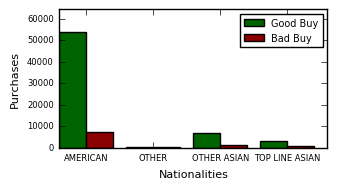

In [98]:
# Plot Dimension
plt.figure(figsize=(3.5,2))
ax1 = plt.subplot(111)

# text on bars top
def autolabel(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom',fontsize=6)

# SubPlot 1 - Good and Bad Buys for Nationality
nationalities = sorted(df['Nationality'].unique())
xtabNationalitiesGoodBadBuy = pd.crosstab(df['Nationality'], df['IsBadBuy'])
nBadBuysNationalities = xtabNationalitiesGoodBadBuy[1][:].tolist()
nGoodBuysNationalities = xtabNationalitiesGoodBadBuy[0][:].tolist()

index_x_1 = np.arange(len(nationalities))
bar_width_1 = 0.4
opacity_1 = 1

# Good Buy Bar
rects1 = ax1.bar(
    index_x_1, 
    nGoodBuysNationalities, 
    bar_width_1,
    alpha=opacity_1,
    color='darkgreen',
    label='Good Buy')

# Bad Buy Bar
rects2 = ax1.bar(
    index_x_1+bar_width_1,
    nBadBuysNationalities,
    bar_width_1,
    alpha=opacity_1,
    color='darkred',
    label='Bad Buy')

ax1.set_xlabel('Nationalities',fontsize=8)
ax1.set_ylabel('Purchases',fontsize=8)
#ax1.set_title('Purchases for Nationality',fontsize=10)
ax1.set_xticks(index_x_1+bar_width_1)
ax1.set_xticklabels(nationalities)
ax1.set_ylim([0, (np.amax(nGoodBuysNationalities))* 1.2])
ax1.tick_params(axis='x', labelsize=6)
ax1.tick_params(axis='y', labelsize=6)
ax1.legend((rects1[0], rects2[0]), ('Good Buy', 'Bad Buy'), fontsize=7)
#ax1.set_axis_bgcolor('lightgrey')

#autolabel(rects1,ax1)
#autolabel(rects2,ax1)

# Plot Show
plt.tight_layout()

# Save plot image
plt.savefig('saved_plots/plots_nationality_goodbadbuy.png')

plt.show()

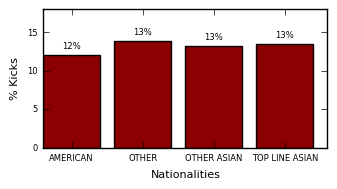

In [99]:
# Plot Dimension
plt.figure(figsize=(3.5,2))
ax2 = plt.subplot(111)

# text on bars top
def autolabel(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height)+'%',
                ha='center', va='bottom',fontsize=6)

nationalities = sorted(df['Nationality'].unique())
xtabNationalitiesGoodBadBuy = pd.crosstab(df['Nationality'], df['IsBadBuy'])
nBadBuysNationalities = xtabNationalitiesGoodBadBuy[1][:].tolist()
nGoodBuysNationalities = xtabNationalitiesGoodBadBuy[0][:].tolist()
totalBuy = len(df['Nationality'])
        
# % Bad Buy
nPercentageNationalityBadBuys = []
nPercentageNationalityGoodBuy = []
for (good, bad) in zip(nGoodBuysNationalities, nBadBuysNationalities):
    totalBuy = good + bad
    nPercentageNationalityGoodBuy.append(round((float(good) / float(totalBuy)) * 100, 2))
    nPercentageNationalityBadBuys.append(round((float(bad) / float(totalBuy)) * 100, 2))
    
index_x_2 = np.arange(len(nationalities))
bar_width_2 = 0.8
opacity_2 = 1

# Bad Buy Bar
rects1 = ax2.bar(
    index_x_2, 
    nPercentageNationalityBadBuys, 
    bar_width_2,
    alpha=opacity_2,
    color='darkred',
    label='% Bad Buy')

ax2.set_xlabel('Nationalities',fontsize=8)
ax2.set_ylabel('% Kicks',fontsize=8)
#ax2.set_title('% Kicks for Nationality',fontsize=12)
ax2.set_xticks(index_x_2+(bar_width_2/2))
ax2.set_xticklabels(nationalities)
ax2.set_ylim([0, (np.amax(nPercentageNationalityBadBuys))* 1.3])
ax2.tick_params(axis='x', labelsize=6)
ax2.tick_params(axis='y', labelsize=6)
#ax2.set_axis_bgcolor('lightgrey')

autolabel(rects1,ax2)


# Plot Show
plt.tight_layout()

# Save plot image
plt.savefig('saved_plots/plots_nationality_kicks.png')

plt.show()

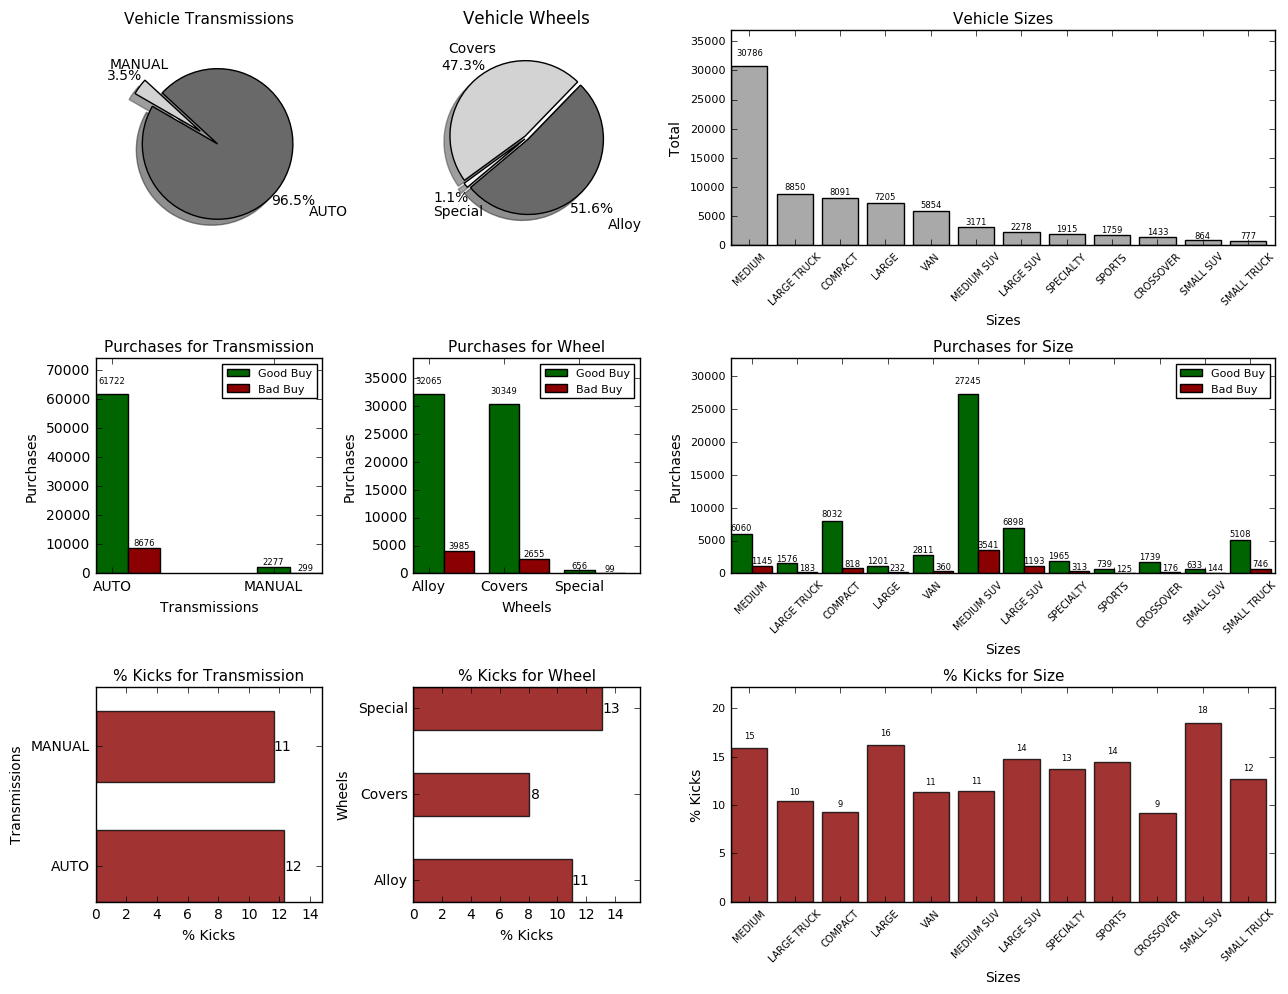

In [9]:
# Car Specification Analysis

# Transmission 
transmissions = df['Transmission'].unique().tolist()
transmissions.remove('NS') #not enough samples
dfTransmissions = df[df.Transmission != 'NS']
xtab_trans_badbuy = pd.crosstab(dfTransmissions['Transmission'], dfTransmissions['IsBadBuy'])
nTransmissionBadBuy = xtab_trans_badbuy[1][:].tolist()
nTrasmissionGoodBuy = xtab_trans_badbuy[0][:].tolist()
transCounter = dfTransmissions['Transmission'].value_counts().tolist()

# Wheel
wheels = df['WheelType'].unique().tolist()
wheels.remove('NS')
dfWheels = df[df.WheelType != 'NS']
xtab_wheel_badbuy = pd.crosstab(dfWheels['WheelType'], dfWheels['IsBadBuy'])
nWheelBadBuy = xtab_wheel_badbuy[1][:].tolist()
nWheelGoodBuy = xtab_wheel_badbuy[0][:].tolist()
wheelCounter = dfWheels['WheelType'].value_counts().tolist()

# Size
sizes = df['Size'].unique().tolist()
xtab_size_badbuy = pd.crosstab(df['Size'], df['IsBadBuy'])
nSizeBadBuy = xtab_size_badbuy[1][:].tolist()
nSizeGoodBuy = xtab_size_badbuy[0][:].tolist()
sizeCounter = df['Size'].value_counts().tolist()

# Color
# Trim
# Model
# SubModel

# Plot Settings
fig = plt.figure(figsize=(13,10))
ax1 = plt.subplot2grid((3,4), (0,0))
ax2 = plt.subplot2grid((3,4), (0,1))
ax3 = plt.subplot2grid((3,4), (0,2), colspan=2)
ax4 = plt.subplot2grid((3,4), (1,0))
ax5 = plt.subplot2grid((3,4), (1,1))
ax6 = plt.subplot2grid((3,4), (1,2), colspan=2)
ax7 = plt.subplot2grid((3,4), (2,0))
ax8 = plt.subplot2grid((3,4), (2,1))
ax9 = plt.subplot2grid((3,4), (2,2), colspan=2)

# text on bars top
def autolabel(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom',fontsize=6)
        
def autolabel_horizontal(rects, ax):
    for rect in rects:
        width = rect.get_width()
        ax.text(1.05*rect.get_width(), rect.get_y()+0.5*rect.get_height(),
                 '%d' % int(width),
                 ha='center', va='center')        

# SubPlot 1 - Total Transmissions
ax1.pie(
    transCounter, 
    explode=(0.05,0.05), 
    labels=transmissions, 
    labeldistance=1.5,
    colors=['dimgray','lightgrey'],
    pctdistance= 1.25,
    autopct='%1.1f%%', 
    shadow=True, 
    startangle=150,
    radius=0.35, 
    center=(0.5, 0.5),          #pie center position
    frame=True)

ax1.axis('off')                 #remove axis
ax1.set_title('Vehicle Transmissions',fontsize=11)
ax1.set_aspect('equal')         #make a perfect circle

# SubPlot 2 - Total Wheels
ax2.pie(
    wheelCounter, 
    explode=(0.01,0.01,0.01), 
    labels=wheels, 
    labeldistance=1.55,
    colors=['dimgray','lightgrey','whitesmoke'],
    pctdistance= 1.25,
    autopct='%1.1f%%', 
    shadow=True, 
    startangle=220,
    radius=0.35, 
    center=(0.5, 0.5),          #pie center position
    frame=True)

ax2.axis('off')
ax2.set_title('Vehicle Wheels',fontsize=12)
ax2.set_aspect('equal')   

# SubPlot 3 - Total Sizes
index_x_3 = np.arange(len(sizes))
bar_width_3 = 0.8
opacity_3 = 1

# Bad Buy Bar
rects1 = ax3.bar(
    index_x_3, 
    sizeCounter, 
    bar_width_3,
    alpha=opacity_3,
    color='darkgrey',
    label='Total Sizes')

ax3.set_xlabel('Sizes',fontsize=10)
ax3.set_ylabel('Total',fontsize=10)
ax3.set_title('Vehicle Sizes',fontsize=11)
ax3.set_xticks(index_x_3+(bar_width_3/2))
ax3.set_xticklabels(sizes, rotation=45)
ax3.set_ylim([0, (np.amax(sizeCounter))* 1.2])
ax3.tick_params(axis='x', labelsize=7)
ax3.tick_params(axis='y', labelsize=8)
#ax3.set_axis_bgcolor('lightgrey')

autolabel(rects1,ax3)

# SubPlot 4 - Purchases for Transmission
index_x_4 = np.arange(len(transmissions))
bar_width_4 = 0.2
opacity_4 = 1

# Good Buy Bar
rects1 = ax4.bar(
    index_x_4, 
    nTrasmissionGoodBuy, 
    bar_width_4,
    alpha=opacity_4,
    color='darkgreen',
    label='Good Buy')

# Bad Buy Bar
rects2 = ax4.bar(
    index_x_4+bar_width_4,
    nTransmissionBadBuy,
    bar_width_4,
    alpha=opacity_4,
    color='darkred',
    label='Bad Buy')

ax4.set_xlabel('Transmissions',fontsize=10)
ax4.set_ylabel('Purchases',fontsize=10)
ax4.set_title('Purchases for Transmission',fontsize=11)
ax4.set_xticks(index_x_4+bar_width_4/2)
ax4.set_xticklabels(transmissions)
ax4.set_ylim([0, (np.amax(nTrasmissionGoodBuy))* 1.2])
ax4.tick_params(axis='x', labelsize=10)
ax4.tick_params(axis='y', labelsize=10)
ax4.legend((rects1[0], rects2[0]), ('Good Buy', 'Bad Buy'), fontsize=8)
#ax4.set_axis_bgcolor('lightgrey')

autolabel(rects1,ax4)
autolabel(rects2,ax4)

# SubPlot 5 - Purchases for Wheel
index_x_5 = np.arange(len(wheels))
bar_width_5 = 0.4
opacity_5 = 1

# Good Buy Bar
rects1 = ax5.bar(
    index_x_5, 
    nWheelGoodBuy, 
    bar_width_5,
    alpha=opacity_5,
    color='darkgreen',
    label='Good Buy')

# Bad Buy Bar
rects2 = ax5.bar(
    index_x_5+bar_width_5,
    nWheelBadBuy,
    bar_width_5,
    alpha=opacity_5,
    color='darkred',
    label='Bad Buy')

ax5.set_xlabel('Wheels',fontsize=10)
ax5.set_ylabel('Purchases',fontsize=10)
ax5.set_title('Purchases for Wheel',fontsize=11)
ax5.set_xticks(index_x_5+bar_width_5/2)
ax5.set_xticklabels(wheels)
ax5.set_ylim([0, (np.amax(nWheelGoodBuy))* 1.2])
ax5.tick_params(axis='x', labelsize=10)
ax5.tick_params(axis='y', labelsize=10)
ax5.legend((rects1[0], rects2[0]), ('Good Buy', 'Bad Buy'), fontsize=8)
#ax5.set_axis_bgcolor('lightgrey')

autolabel(rects1,ax5)
autolabel(rects2,ax5)

# SubPlot 6 - Purchases for Size
index_x_6 = np.arange(len(sizes))
bar_width_6 = 0.45
opacity_6 = 1

# Good Buy Bar
rects1 = ax6.bar(
    index_x_6, 
    nSizeGoodBuy, 
    bar_width_6,
    alpha=opacity_6,
    color='darkgreen',
    label='Good Buy')

# Bad Buy Bar
rects2 = ax6.bar(
    index_x_6+bar_width_6,
    nSizeBadBuy,
    bar_width_6,
    alpha=opacity_6,
    color='darkred',
    label='Bad Buy')

ax6.set_xlabel('Sizes',fontsize=10)
ax6.set_ylabel('Purchases',fontsize=10)
ax6.set_title('Purchases for Size',fontsize=11)
ax6.set_xticks(index_x_6+bar_width_6)
ax6.set_xticklabels(sizes, rotation=45)
ax6.set_ylim([0, (np.amax(nSizeGoodBuy))* 1.2])
ax6.tick_params(axis='x', labelsize=7)
ax6.tick_params(axis='y', labelsize=8)
ax6.legend((rects1[0], rects2[0]), ('Good Buy', 'Bad Buy'), fontsize=8)
#ax5.set_axis_bgcolor('lightgrey')

autolabel(rects1,ax6)
autolabel(rects2,ax6)

# SubPlot 7 - % Kicks for Transmission
# % Bad Buy
nPercentageTransmissionBadBuys = []
nPercentageTransmissionGoodBuy = []
for (good, bad) in zip(nTrasmissionGoodBuy, nTransmissionBadBuy):
    totalBuy = good + bad
    nPercentageTransmissionGoodBuy.append(round((float(good) / float(totalBuy)) * 100, 2))
    nPercentageTransmissionBadBuys.append(round((float(bad) / float(totalBuy)) * 100, 2))
    
index_y_7 = np.arange(len(transmissions))
bar_width_7 = 0.6
opacity_7 = 0.8

# Bad Buy Bar
rects1 = ax7.barh(
    index_y_7, 
    nPercentageTransmissionBadBuys, 
    bar_width_7,
    alpha=opacity_7,
    color='darkred',
    label='% Bad Buy')

ax7.set_ylabel('Transmissions',fontsize=10)
ax7.set_xlabel('% Kicks',fontsize=10)
ax7.set_title('% Kicks for Transmission',fontsize=11)
ax7.set_yticks(index_y_7+(bar_width_7/2))
ax7.set_yticklabels(transmissions)
ax7.set_xlim([0, (np.amax(nPercentageTransmissionBadBuys))* 1.2])
ax7.tick_params(axis='x', labelsize=10)
ax7.tick_params(axis='y', labelsize=10)
#ax7.set_axis_bgcolor('lightgrey')

autolabel_horizontal(rects1,ax7)

# SubPlot 8 - % Kicks for Wheel
# % Bad Buy
nPercentageWheelBadBuys = []
nPercentageWheelGoodBuy = []
for (good, bad) in zip(nWheelGoodBuy, nWheelBadBuy):
    totalBuy = good + bad
    nPercentageWheelGoodBuy.append(round((float(good) / float(totalBuy)) * 100, 2))
    nPercentageWheelBadBuys.append(round((float(bad) / float(totalBuy)) * 100, 2))
    
index_y_8 = np.arange(len(wheels))
bar_width_8 = 0.5
opacity_8 = 0.8

# Bad Buy Bar
rects1 = ax8.barh(
    index_y_8, 
    nPercentageWheelBadBuys, 
    bar_width_8,
    alpha=opacity_8,
    color='darkred',
    label='% Bad Buy')

ax8.set_ylabel('Wheels',fontsize=10)
ax8.set_xlabel('% Kicks',fontsize=10)
ax8.set_title('% Kicks for Wheel',fontsize=11)
ax8.set_yticks(index_y_8+(bar_width_8/2))
ax8.set_yticklabels(wheels)
ax8.set_xlim([0, (np.amax(nPercentageWheelBadBuys))* 1.2])
ax8.tick_params(axis='x', labelsize=10)
ax8.tick_params(axis='y', labelsize=10)
#ax8.set_axis_bgcolor('lightgrey')

autolabel_horizontal(rects1,ax8)

# SubPlot 9 - % Kicks for Size
# % Bad Buy
nPercentageSizeBadBuys = []
nPercentageSizeGoodBuy = []
for (good, bad) in zip(nSizeGoodBuy, nSizeBadBuy):
    totalBuy = good + bad
    nPercentageSizeGoodBuy.append(round((float(good) / float(totalBuy)) * 100, 2))
    nPercentageSizeBadBuys.append(round((float(bad) / float(totalBuy)) * 100, 2))
    
index_x_9 = np.arange(len(sizes))
bar_width_9 = 0.8
opacity_9 = 0.8

# Bad Buy Bar
rects1 = ax9.bar(
    index_x_9, 
    nPercentageSizeBadBuys, 
    bar_width_9,
    alpha=opacity_9,
    color='darkred',
    label='Total Sizes')

ax9.set_xlabel('Sizes',fontsize=10)
ax9.set_ylabel('% Kicks',fontsize=10)
ax9.set_title('% Kicks for Size',fontsize=11)
ax9.set_xticks(index_x_9+(bar_width_9/2))
ax9.set_xticklabels(sizes, rotation=45)
ax9.set_ylim([0, (np.amax(nPercentageSizeBadBuys))* 1.2])
ax9.tick_params(axis='x', labelsize=7)
ax9.tick_params(axis='y', labelsize=8)
#ax9.set_axis_bgcolor('lightgrey')

autolabel(rects1,ax9)

plt.tight_layout()

# Save plot image
plt.savefig('saved_plots/plots_trans_wheel_size.png')

plt.show()

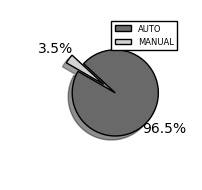

In [10]:
# Transmission Part 1

# Transmission 
transmissions = df['Transmission'].unique().tolist()

transmissions.remove('NS') #not enough samples
dfTransmissions = df[df.Transmission != 'NS']
xtab_trans_badbuy = pd.crosstab(dfTransmissions['Transmission'], dfTransmissions['IsBadBuy'])
nTransmissionBadBuy = xtab_trans_badbuy[1][:].tolist()
nTrasmissionGoodBuy = xtab_trans_badbuy[0][:].tolist()
transCounter = dfTransmissions['Transmission'].value_counts().tolist()

fig = plt.figure(figsize=(3,2))
ax1 = plt.subplot(111)
        
# SubPlot 1 - Total Transmissions
ax1.pie(
    transCounter, 
    explode=(0.05,0.05), 
    labels=None, 
    labeldistance=1.62,
    colors=['dimgray','lightgrey'],
    pctdistance= 1.40,
    autopct='%1.1f%%', 
    shadow=True, 
    startangle=150,
    radius=0.30, 
    center=(0.5, 0.5),          #pie center position
    frame=True)

ax1.axis('off')                 #remove axis
#ax1.set_title('Vehicle Transmissions',fontsize=11)
ax1.set_aspect('equal')         #make a perfect circle
ax1.legend(transmissions,fontsize=6)

plt.tight_layout()

# Save plot image
plt.savefig('saved_plots/plots_transmission_total.png')

plt.show()

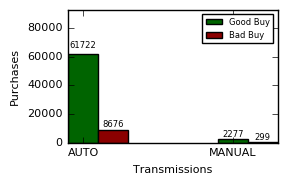

In [16]:
# Transmission Part 2

# Transmission 
transmissions = df['Transmission'].unique().tolist()

transmissions.remove('NS') #not enough samples
dfTransmissions = df[df.Transmission != 'NS']
xtab_trans_badbuy = pd.crosstab(dfTransmissions['Transmission'], dfTransmissions['IsBadBuy'])
nTransmissionBadBuy = xtab_trans_badbuy[1][:].tolist()
nTrasmissionGoodBuy = xtab_trans_badbuy[0][:].tolist()
transCounter = dfTransmissions['Transmission'].value_counts().tolist()

# text on bars top
def autolabel(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom',fontsize=6)

fig = plt.figure(figsize=(3,2))
ax4 = plt.subplot(111)

# SubPlot 4 - Purchases for Transmission
index_x_4 = np.arange(len(transmissions))
bar_width_4 = 0.2
opacity_4 = 1

# Good Buy Bar
rects1 = ax4.bar(
    index_x_4, 
    nTrasmissionGoodBuy, 
    bar_width_4,
    alpha=opacity_4,
    color='darkgreen',
    label='Good Buy')

# Bad Buy Bar
rects2 = ax4.bar(
    index_x_4+bar_width_4,
    nTransmissionBadBuy,
    bar_width_4,
    alpha=opacity_4,
    color='darkred',
    label='Bad Buy')

ax4.set_xlabel('Transmissions',fontsize=8)
ax4.set_ylabel('Purchases',fontsize=8)
#ax4.set_title('Purchases for Transmission',fontsize=11)
ax4.set_xticks(index_x_4+bar_width_4/2)
ax4.set_xticklabels(transmissions)
ax4.set_ylim([0, (np.amax(nTrasmissionGoodBuy))* 1.5])
ax4.tick_params(axis='x', labelsize=8)
ax4.tick_params(axis='y', labelsize=8)
ax4.legend((rects1[0], rects2[0]), ('Good Buy', 'Bad Buy'), fontsize=6)
#ax4.set_axis_bgcolor('lightgrey')

autolabel(rects1,ax4)
autolabel(rects2,ax4)

plt.tight_layout()

# Save plot image
plt.savefig('saved_plots/plots_transmission_goodbadbuy.png')

plt.show()

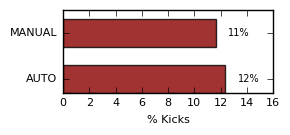

In [239]:
# Transmission Part 3

# Transmission 
transmissions = df['Transmission'].unique().tolist()

transmissions.remove('NS') #not enough samples
dfTransmissions = df[df.Transmission != 'NS']
xtab_trans_badbuy = pd.crosstab(dfTransmissions['Transmission'], dfTransmissions['IsBadBuy'])
nTransmissionBadBuy = xtab_trans_badbuy[1][:].tolist()
nTrasmissionGoodBuy = xtab_trans_badbuy[0][:].tolist()
transCounter = dfTransmissions['Transmission'].value_counts().tolist()

# text on top (%)
def autolabel_horizontal(rects, ax):
    for rect in rects:
        width = rect.get_width()
        ax.text(1.15*rect.get_width(), rect.get_y()+0.5*rect.get_height(),
                 '%d' % int(width)+'%',
                 ha='center', va='center',fontsize=7)  

fig = plt.figure(figsize=(3,1.5))
ax7 = plt.subplot(111)

# SubPlot 7 - % Kicks for Transmission
# % Bad Buy
nPercentageTransmissionBadBuys = []
nPercentageTransmissionGoodBuy = []
for (good, bad) in zip(nTrasmissionGoodBuy, nTransmissionBadBuy):
    totalBuy = good + bad
    nPercentageTransmissionGoodBuy.append(round((float(good) / float(totalBuy)) * 100, 2))
    nPercentageTransmissionBadBuys.append(round((float(bad) / float(totalBuy)) * 100, 2))
    
index_y_7 = np.arange(len(transmissions))
bar_width_7 = 0.6
opacity_7 = 0.8

# Bad Buy Bar
rects1 = ax7.barh(
    index_y_7, 
    nPercentageTransmissionBadBuys, 
    bar_width_7,
    alpha=opacity_7,
    color='darkred',
    label='% Bad Buy')

#ax7.set_ylabel('Transmissions',fontsize=8)
ax7.set_xlabel('% Kicks',fontsize=8)
#ax7.set_title('% Kicks for Transmission',fontsize=11)
ax7.set_yticks(index_y_7+(bar_width_7/2))
ax7.set_yticklabels(transmissions)
ax7.set_xlim([0, (np.amax(nPercentageTransmissionBadBuys))* 1.3])
ax7.tick_params(axis='x', labelsize=8)
ax7.tick_params(axis='y', labelsize=8)
#ax7.set_axis_bgcolor('lightgrey')

autolabel_horizontal(rects1,ax7)

plt.tight_layout()

# Save plot image
plt.savefig('saved_plots/plots_transmission_kicks.png')

plt.show()

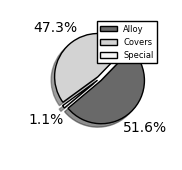

In [23]:
# Wheels Part 1

# Wheel
wheels = df['WheelType'].unique().tolist()
wheels.remove('NS')
dfWheels = df[df.WheelType != 'NS']
xtab_wheel_badbuy = pd.crosstab(dfWheels['WheelType'], dfWheels['IsBadBuy'])
nWheelBadBuy = xtab_wheel_badbuy[1][:].tolist()
nWheelGoodBuy = xtab_wheel_badbuy[0][:].tolist()
wheelCounter = dfWheels['WheelType'].value_counts().tolist()

fig = plt.figure(figsize=(3,1.8))
ax2 = plt.subplot(111)

# SubPlot 2 - Total Wheels
ax2.pie(
    wheelCounter, 
    explode=(0.02,0.02,0.02), 
    labels=None, 
    labeldistance=1.65,
    colors=['dimgray','lightgrey','whitesmoke'],
    pctdistance= 1.50,
    autopct='%1.1f%%', 
    shadow=True, 
    startangle=220,
    radius=0.35, 
    center=(0.5, 0.5),          #pie center position
    frame=True)

ax2.axis('off')
#ax2.set_title('Vehicle Wheels',fontsize=12)
ax2.set_aspect('equal')   
ax2.legend(wheels,fontsize=6)

plt.tight_layout()

# Save plot image
plt.savefig('saved_plots/plots_wheel_total.png')

plt.show()

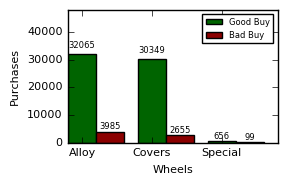

In [237]:
# Wheels Part 2

# Wheel
wheels = df['WheelType'].unique().tolist()
wheels.remove('NS')
dfWheels = df[df.WheelType != 'NS']
xtab_wheel_badbuy = pd.crosstab(dfWheels['WheelType'], dfWheels['IsBadBuy'])
nWheelBadBuy = xtab_wheel_badbuy[1][:].tolist()
nWheelGoodBuy = xtab_wheel_badbuy[0][:].tolist()
wheelCounter = dfWheels['WheelType'].value_counts().tolist()

# text on bars top
def autolabel(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom',fontsize=6)

fig = plt.figure(figsize=(3,2))
ax5 = plt.subplot(111)

# SubPlot 5 - Purchases for Wheel
index_x_5 = np.arange(len(wheels))
bar_width_5 = 0.4
opacity_5 = 1

# Good Buy Bar
rects1 = ax5.bar(
    index_x_5, 
    nWheelGoodBuy, 
    bar_width_5,
    alpha=opacity_5,
    color='darkgreen',
    label='Good Buy')

# Bad Buy Bar
rects2 = ax5.bar(
    index_x_5+bar_width_5,
    nWheelBadBuy,
    bar_width_5,
    alpha=opacity_5,
    color='darkred',
    label='Bad Buy')

ax5.set_xlabel('Wheels',fontsize=8)
ax5.set_ylabel('Purchases',fontsize=8)
#ax5.set_title('Purchases for Wheel',fontsize=11)
ax5.set_xticks(index_x_5+bar_width_5/2)
ax5.set_xticklabels(wheels)
ax5.set_ylim([0, (np.amax(nWheelGoodBuy))* 1.5])
ax5.tick_params(axis='x', labelsize=8)
ax5.tick_params(axis='y', labelsize=8)
ax5.legend((rects1[0], rects2[0]), ('Good Buy', 'Bad Buy'), fontsize=6)
#ax5.set_axis_bgcolor('lightgrey')

autolabel(rects1,ax5)
autolabel(rects2,ax5)

plt.tight_layout()

# Save plot image
plt.savefig('saved_plots/plots_wheel_goodbadbuy.png')

plt.show()

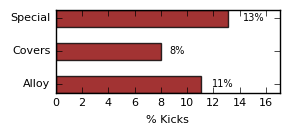

In [230]:
# Wheels Part 3

# Wheel
wheels = df['WheelType'].unique().tolist()
wheels.remove('NS')
dfWheels = df[df.WheelType != 'NS']
xtab_wheel_badbuy = pd.crosstab(dfWheels['WheelType'], dfWheels['IsBadBuy'])
nWheelBadBuy = xtab_wheel_badbuy[1][:].tolist()
nWheelGoodBuy = xtab_wheel_badbuy[0][:].tolist()
wheelCounter = dfWheels['WheelType'].value_counts().tolist()

# text on top (%)
def autolabel_horizontal(rects, ax):
    for rect in rects:
        width = rect.get_width()
        ax.text(1.15*rect.get_width(), rect.get_y()+0.5*rect.get_height(),
                 '%d' % int(width)+'%',
                 ha='center', va='center',fontsize=7)  

fig = plt.figure(figsize=(3,1.5))
ax8 = plt.subplot(111)

# SubPlot 8 - % Kicks for Wheel
# % Bad Buy
nPercentageWheelBadBuys = []
nPercentageWheelGoodBuy = []
for (good, bad) in zip(nWheelGoodBuy, nWheelBadBuy):
    totalBuy = good + bad
    nPercentageWheelGoodBuy.append(round((float(good) / float(totalBuy)) * 100, 2))
    nPercentageWheelBadBuys.append(round((float(bad) / float(totalBuy)) * 100, 2))
    
index_y_8 = np.arange(len(wheels))
bar_width_8 = 0.5
opacity_8 = 0.8

# Bad Buy Bar
rects1 = ax8.barh(
    index_y_8, 
    nPercentageWheelBadBuys, 
    bar_width_8,
    alpha=opacity_8,
    color='darkred',
    label='% Bad Buy')

#ax8.set_ylabel('Wheels',fontsize=10)
ax8.set_xlabel('% Kicks',fontsize=8)
#ax8.set_title('% Kicks for Wheel',fontsize=11)
ax8.set_yticks(index_y_8+(bar_width_8/2))
ax8.set_yticklabels(wheels)
ax8.set_xlim([0, (np.amax(nPercentageWheelBadBuys))* 1.3])
ax8.tick_params(axis='x', labelsize=8)
ax8.tick_params(axis='y', labelsize=8)
#ax8.set_axis_bgcolor('lightgrey')

autolabel_horizontal(rects1,ax8)

plt.tight_layout()

# Save plot image
plt.savefig('saved_plots/plots_wheel_kicks.png')

plt.show()

MEDIUM         30786
LARGE           8850
MEDIUM SUV      8091
COMPACT         7205
VAN             5854
LARGE TRUCK     3171
SMALL SUV       2278
SPECIALTY       1915
CROSSOVER       1759
LARGE SUV       1433
SMALL TRUCK      864
SPORTS           777
Name: Size, dtype: int64


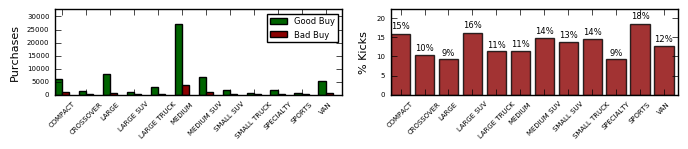

In [255]:
# Sizes Part 1

# Size
sizes = sorted(df['Size'].unique())
xtab_size_badbuy = pd.crosstab(df['Size'], df['IsBadBuy'])
nSizeBadBuy = xtab_size_badbuy[1][:].tolist()
nSizeGoodBuy = xtab_size_badbuy[0][:].tolist()
sizeCounter = df['Size'].value_counts().tolist()

# text on bars top
def autolabel(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom',fontsize=6)
        
# text on bars top %
def autolabel_percentage(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height)+'%',
                ha='center', va='bottom',fontsize=6)        
        
fig = plt.figure(figsize=(7,1.6))
ax6 = plt.subplot(121)
ax9 = plt.subplot(122)

# SubPlot 6 - Purchases for Size
index_x_6 = np.arange(len(sizes))
bar_width_6 = 0.3
opacity_6 = 1

# Good Buy Bar
rects1 = ax6.bar(
    index_x_6, 
    nSizeGoodBuy, 
    bar_width_6,
    alpha=opacity_6,
    color='darkgreen',
    label='Good Buy')

# Bad Buy Bar
rects2 = ax6.bar(
    index_x_6+bar_width_6,
    nSizeBadBuy,
    bar_width_6,
    alpha=opacity_6,
    color='darkred',
    label='Bad Buy')

#ax6.set_xlabel('Sizes',fontsize=8)
ax6.set_ylabel('Purchases',fontsize=8)
#ax6.set_title('Purchases for Size',fontsize=11)
ax6.set_xticks(index_x_6+bar_width_6)
ax6.set_xticklabels(sizes, rotation=45)
ax6.set_ylim([0, (np.amax(nSizeGoodBuy))* 1.2])
ax6.tick_params(axis='x', labelsize=5)
ax6.tick_params(axis='y', labelsize=5)
ax6.legend((rects1[0], rects2[0]), ('Good Buy', 'Bad Buy'), fontsize=6)
#ax5.set_axis_bgcolor('lightgrey')

#autolabel(rects1,ax6)
#autolabel(rects2,ax6)

# SubPlot 9 - % Kicks for Size
# % Bad Buy
nPercentageSizeBadBuys = []
nPercentageSizeGoodBuy = []
for (good, bad) in zip(nSizeGoodBuy, nSizeBadBuy):
    totalBuy = good + bad
    nPercentageSizeGoodBuy.append(round((float(good) / float(totalBuy)) * 100, 2))
    nPercentageSizeBadBuys.append(round((float(bad) / float(totalBuy)) * 100, 2))
    
index_x_9 = np.arange(len(sizes))
bar_width_9 = 0.8
opacity_9 = 0.8

# Bad Buy Bar
rects1 = ax9.bar(
    index_x_9, 
    nPercentageSizeBadBuys, 
    bar_width_9,
    alpha=opacity_9,
    color='darkred',
    label='Total Sizes')

#ax9.set_xlabel('Sizes',fontsize=8)
ax9.set_ylabel('% Kicks',fontsize=8)
#ax9.set_title('% Kicks for Size',fontsize=11)
ax9.set_xticks(index_x_9+(bar_width_9/2))
ax9.set_xticklabels(sizes, rotation=45)
ax9.set_ylim([0, (np.amax(nPercentageSizeBadBuys))* 1.2])
ax9.tick_params(axis='x', labelsize=5)
ax9.tick_params(axis='y', labelsize=5)
#ax9.set_axis_bgcolor('lightgrey')

autolabel_percentage(rects1,ax9)

plt.tight_layout()

# Save plot image
plt.savefig('saved_plots/plots_sizes.png')

plt.show()

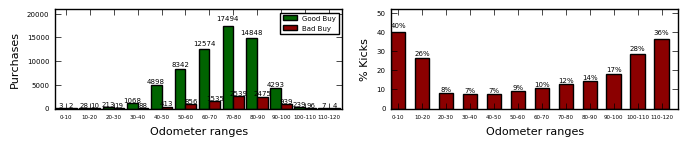

In [22]:
# Vehicle Odometer Analysis

dfBadBuy = df[(df['IsBadBuy'] == 1)]
dfGoodBuy = df[(df['IsBadBuy']) == 0]

# Group Odometers with 10k ranges
nGroupsVehOdoBadBuy = []
nGroupsVehOdoGoodBuy = []

# 0 - 10k
nGroupsVehOdoBadBuy.append(len(df.loc[(df['VehOdo'] >= 0) & (df['VehOdo'] < 10000) & (df['IsBadBuy'] == 1)].VehOdo))
nGroupsVehOdoGoodBuy.append(len(df.loc[(df['VehOdo'] >= 0) & (df['VehOdo'] < 10000) & (df['IsBadBuy'] == 0)].VehOdo))
# 10k - 20k
nGroupsVehOdoBadBuy.append(len(df.loc[(df['VehOdo'] >= 10000) & (df['VehOdo'] < 20000) & (df['IsBadBuy'] == 1)].VehOdo))
nGroupsVehOdoGoodBuy.append(len(df.loc[(df['VehOdo'] >= 10000) & (df['VehOdo'] < 20000) & (df['IsBadBuy'] == 0)].VehOdo))
# 20k - 30k
nGroupsVehOdoBadBuy.append(len(df.loc[(df['VehOdo'] >= 20000) & (df['VehOdo'] < 30000) & (df['IsBadBuy'] == 1)].VehOdo))
nGroupsVehOdoGoodBuy.append(len(df.loc[(df['VehOdo'] >= 20000) & (df['VehOdo'] < 30000) & (df['IsBadBuy'] == 0)].VehOdo))
# 30k - 40k
nGroupsVehOdoBadBuy.append(len(df.loc[(df['VehOdo'] >= 30000) & (df['VehOdo'] < 40000) & (df['IsBadBuy'] == 1)].VehOdo))
nGroupsVehOdoGoodBuy.append(len(df.loc[(df['VehOdo'] >= 30000) & (df['VehOdo'] < 40000) & (df['IsBadBuy'] == 0)].VehOdo))
# 40k - 50k
nGroupsVehOdoBadBuy.append(len(df.loc[(df['VehOdo'] >= 40000) & (df['VehOdo'] < 50000) & (df['IsBadBuy'] == 1)].VehOdo))
nGroupsVehOdoGoodBuy.append(len(df.loc[(df['VehOdo'] >= 40000) & (df['VehOdo'] < 50000) & (df['IsBadBuy'] == 0)].VehOdo))
# 50k - 60k
nGroupsVehOdoBadBuy.append(len(df.loc[(df['VehOdo'] >= 50000) & (df['VehOdo'] < 60000) & (df['IsBadBuy'] == 1)].VehOdo))
nGroupsVehOdoGoodBuy.append(len(df.loc[(df['VehOdo'] >= 50000) & (df['VehOdo'] < 60000) & (df['IsBadBuy'] == 0)].VehOdo))
# 60k - 70k
nGroupsVehOdoBadBuy.append(len(df.loc[(df['VehOdo'] >= 60000) & (df['VehOdo'] < 70000) & (df['IsBadBuy'] == 1)].VehOdo))
nGroupsVehOdoGoodBuy.append(len(df.loc[(df['VehOdo'] >= 60000) & (df['VehOdo'] < 70000) & (df['IsBadBuy'] == 0)].VehOdo))
# 70k - 80k
nGroupsVehOdoBadBuy.append(len(df.loc[(df['VehOdo'] >= 70000) & (df['VehOdo'] < 80000) & (df['IsBadBuy'] == 1)].VehOdo))
nGroupsVehOdoGoodBuy.append(len(df.loc[(df['VehOdo'] >= 70000) & (df['VehOdo'] < 80000) & (df['IsBadBuy'] == 0)].VehOdo))
# 80k - 90k
nGroupsVehOdoBadBuy.append(len(df.loc[(df['VehOdo'] >= 80000) & (df['VehOdo'] < 90000) & (df['IsBadBuy'] == 1)].VehOdo))
nGroupsVehOdoGoodBuy.append(len(df.loc[(df['VehOdo'] >= 80000) & (df['VehOdo'] < 90000) & (df['IsBadBuy'] == 0)].VehOdo))
# 90k - 100k
nGroupsVehOdoBadBuy.append(len(df.loc[(df['VehOdo'] >= 90000) & (df['VehOdo'] < 100000) & (df['IsBadBuy'] == 1)].VehOdo))
nGroupsVehOdoGoodBuy.append(len(df.loc[(df['VehOdo'] >= 90000) & (df['VehOdo'] < 100000) & (df['IsBadBuy'] == 0)].VehOdo))
# 100k - 110k
nGroupsVehOdoBadBuy.append(len(df.loc[(df['VehOdo'] >= 100000) & (df['VehOdo'] < 110000) & (df['IsBadBuy'] == 1)].VehOdo))
nGroupsVehOdoGoodBuy.append(len(df.loc[(df['VehOdo'] >= 100000) & (df['VehOdo'] < 110000) & (df['IsBadBuy'] == 0)].VehOdo))
# 110k - 120k
nGroupsVehOdoBadBuy.append(len(df.loc[(df['VehOdo'] >= 110000) & (df['VehOdo'] < 120000) & (df['IsBadBuy'] == 1)].VehOdo))
nGroupsVehOdoGoodBuy.append(len(df.loc[(df['VehOdo'] >= 110000) & (df['VehOdo'] < 120000) & (df['IsBadBuy'] == 0)].VehOdo))

ranges = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100','100-110','110-120']

fig = plt.figure(figsize=(7,1.6))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

#gs = gridspec.GridSpec(1, 2, width_ratios=[10, 9])   #width_ratios=[1, 1]
#ax1 = fig.add_subplot(gs[0])
#ax2 = fig.add_subplot(gs[1])

# text on bars top
def autolabel(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom',fontsize=5)
        
# text on bars top %
def autolabel_percentage(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height)+'%',
                ha='center', va='bottom',fontsize=5)        

# SubPlot 1 - Kicks for Vehicle Odometer Range
index_x_1 = np.arange(len(ranges))
bar_width_1 = 0.45
opacity_1 = 1

# Good Buy Bar
rects1 = ax1.bar(
    index_x_1, 
    nGroupsVehOdoGoodBuy, 
    bar_width_1,
    alpha=opacity_1,
    color='darkgreen',
    label='Good Buy')

# Bad Buy Bar
rects2 = ax1.bar(
    index_x_1+bar_width_1,
    nGroupsVehOdoBadBuy,
    bar_width_1,
    alpha=opacity_1,
    color='darkred',
    label='Bad Buy')

ax1.set_xlabel('Odometer ranges',fontsize=8)
ax1.set_ylabel('Purchases',fontsize=8)
#ax1.set_title('Purchases for Odometer ranges',fontsize=12)
ax1.set_xticks(index_x_1+bar_width_1)
ax1.set_xticklabels(ranges)
ax1.set_ylim([0, (np.amax(nGroupsVehOdoGoodBuy))* 1.2])
ax1.tick_params(axis='x', labelsize=4)
ax1.tick_params(axis='y', labelsize=5)
ax1.legend((rects1[0], rects2[0]), ('Good Buy', 'Bad Buy'), fontsize=5)
#ax1.set_axis_bgcolor('lightgrey')

autolabel(rects1,ax1)
autolabel(rects2,ax1)

# SubPlot 2 - % Kick for Odometer ranges

# % Bad Buy
nPercentageVehOdoBadBuys = []
nPercentageVehOdoGoodBuy = []
for (good, bad) in zip(nGroupsVehOdoGoodBuy, nGroupsVehOdoBadBuy):
    totalBuy = good + bad
    nPercentageVehOdoGoodBuy.append(round((float(good) / float(totalBuy)) * 100, 2))
    nPercentageVehOdoBadBuys.append(round((float(bad) / float(totalBuy)) * 100, 2))
    
index_x_2 = np.arange(len(ranges))
bar_width_2 = 0.6
opacity_2 = 1

# Bad Buy Bar
rects1 = ax2.bar(
    index_x_2,
    nPercentageVehOdoBadBuys,
    bar_width_2,
    alpha=opacity_2,
    color='darkred',
    label='% Bad Buy')

ax2.set_xlabel('Odometer ranges',fontsize=8)
ax2.set_ylabel('% Kicks',fontsize=8)
#ax2.set_title('% Kicks for Odometer ranges (every 10k)',fontsize=12)
ax2.set_xticks(index_x_2+(bar_width_2/2))
ax2.set_xticklabels(ranges)
ax2.set_ylim([0, (np.amax(nPercentageVehOdoBadBuys))* 1.3])
ax2.tick_params(axis='x', labelsize=4)
ax2.tick_params(axis='y', labelsize=5)
#ax1.set_axis_bgcolor('lightgrey')

autolabel_percentage(rects1,ax2)
    
# Plot Show
plt.tight_layout()

# Save plot image
#plt.savefig('saved_plots/plots_odometer_range.png')

plt.show()

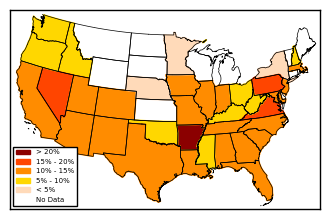

In [104]:
#Bad Buy for USA States

#BaseMap Configuration
#---------------------------------------------

#USA States Dictionary
#need for get state name from state code
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

#Plot Dimension
plt.figure(figsize=(4,4))

#Create the blank map of USA
map = Basemap(
    llcrnrlon=-119,
    llcrnrlat=22,
    urcrnrlon=-64,
    urcrnrlat=49,
    projection='lcc',
    lat_1=33,
    lat_2=45,
    lon_0=-95)

#load the shapefile, use the name 'states'
#Shapefile contains coordinates of each state
map.readshapefile("usa_maps/st99_d00", name='states', drawbounds=True)

# collect the state names from the shapefile attributes so we can
# look up the shape obect for a state by it's name
state_names = []
for shape_dict in map.states_info:
    state_names.append(shape_dict['NAME'])
    
#---------------------------------------------

cars_usa_states = sorted(df['VNST'].unique())

#already sorted in ASC with crosstab
xtab_states_badbuy = pd.crosstab(df['VNST'],df['IsBadBuy'])

#extract column "GoodBuy" (aka IsBadBuy == '0') from DataFrame
nGoodBuyStates = xtab_states_badbuy[xtab_states_badbuy.columns[0]].values

#extract column "BadBuy" (aka IsBadBuy == '1') from DataFrame
nBadBuyStates = xtab_states_badbuy[xtab_states_badbuy.columns[1]].values

goodBuyPercentage = []
badBuyPercentage = []

for (good, bad) in zip(nGoodBuyStates, nBadBuyStates):
    totalBuy = good + bad
    #round(number,decimalsWanted)
    goodBuyPercentage.append(round((float(good) / float(totalBuy)) * 100, 2))
    badBuyPercentage.append(round((float(bad) / float(totalBuy)) * 100, 2))

#get current axes instance
ax = plt.gca()

for (item, good, bad) in zip(cars_usa_states, goodBuyPercentage, badBuyPercentage):
    
    #search state into dictionary
    state = states.get(item)
    
    #determine "Bad Buy" percentage range of a state and print on map
    if bad < 5:    
        seg = map.states[state_names.index(state)]
        poly = Polygon(seg, facecolor='peachpuff',edgecolor='peachpuff')
        ax.add_patch(poly)
    elif 5 <= bad < 10:
        seg = map.states[state_names.index(state)]
        poly = Polygon(seg, facecolor='gold',edgecolor='gold')
        ax.add_patch(poly)
    elif 10 <= bad < 15:
        seg = map.states[state_names.index(state)]
        poly = Polygon(seg, facecolor='darkorange',edgecolor='darkorange')
        ax.add_patch(poly)
    elif 15 <= bad < 20:
        seg = map.states[state_names.index(state)]
        poly = Polygon(seg, facecolor='orangered',edgecolor='orangered')
        ax.add_patch(poly)
    elif bad >= 20:
        seg = map.states[state_names.index(state)]
        poly = Polygon(seg, facecolor='darkred',edgecolor='darkred')
        ax.add_patch(poly)

#Legend
dark_red_patch = mpatches.Patch(color='darkred', label='> 20%')
orangered_patch = mpatches.Patch(color='orangered', label='15% - 20%')
darkorange_patch = mpatches.Patch(color='darkorange', label='10% - 15%')
gold_patch = mpatches.Patch(color='gold', label='5% - 10%')
peachpuff_patch = mpatches.Patch(color='peachpuff', label='< 5%')
white_patch = mpatches.Patch(color='white', label='No Data')

plt.legend(
    #title="Legend",
    loc=3,  #location lower left
    handles=[
        dark_red_patch,
        orangered_patch,
        darkorange_patch,
        gold_patch,
        peachpuff_patch,
        white_patch
    ],
    fontsize=5)

#plt.title('% Kick USA States')

#save plot image
plt.savefig('saved_plots/plots_states_map.png')

plt.show()

In [6]:
xtab = pd.crosstab(df['VNST'],df['IsBadBuy'])
print xtab

IsBadBuy      0     1
VNST                 
AL          602    88
AR           54    16
AZ         5470   704
CA         6144   951
CO         4394   604
FL         9305  1142
GA         2177   273
IA          426    73
ID          177    19
IL          391    67
IN          418    68
KY          215    15
LA          297    52
MA           13     2
MD          993   165
MI           13     1
MN           60     2
MO          676    82
MS          447    46
NC         6243   799
NE           25     1
NH           88     9
NJ          277    40
NM          210    29
NV          472    90
NY            6     0
OH          728    67
OK         3263   331
OR          198    13
PA          700   147
SC         3686   594
TN         1561   203
TX        11719  1877
UT          769   106
VA         1399   263
WA          128     8
WV          263    29


72983
TX    13596
FL    10447
CA     7095
NC     7042
AZ     6174
CO     4998
SC     4280
OK     3594
GA     2450
TN     1764
VA     1662
MD     1158
UT      875
PA      847
OH      795
MO      758
AL      690
NV      562
IA      499
MS      493
IN      486
IL      458
LA      349
NJ      317
WV      292
NM      239
KY      230
OR      211
ID      196
WA      136
NH       97
AR       70
MN       62
NE       26
MA       15
MI       14
NY        6
Name: VNST, dtype: int64


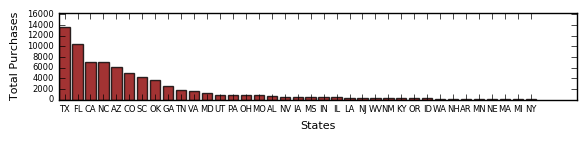

In [5]:
# Total Buys for State

print len(df)
print df['VNST'].value_counts()

total_states = df['VNST'].value_counts().index.tolist()
total_states_values = df['VNST'].value_counts().values.tolist()

#Plot Dimension
plt.figure(figsize=(6,1.5))
ax1 = plt.subplot(111)

index_x = np.arange(len(total_states))
bar_width = 0.8
opacity = 0.8

rects1 = ax1.bar(index_x, 
        total_states_values, 
        bar_width,
        alpha=opacity,
        color='darkred',
        label='Bad Buy')

ax1.set_xlabel('States',fontsize=8)
ax1.set_ylabel('Total Purchases',fontsize=8)
#ax1.set_title('% Kick USA States',fontsize=12)
ax1.set_xticks(index_x+(bar_width/2))
ax1.set_xticklabels(total_states)
ax1.set_ylim([0, (np.amax(total_states_values))* 1.2])
ax1.tick_params(axis='x', labelsize=6)
ax1.tick_params(axis='y', labelsize=6)

#plt.grid()
plt.tight_layout()

#save plot image
plt.savefig('saved_plots/plots_states_histogram_total.png')

plt.show()

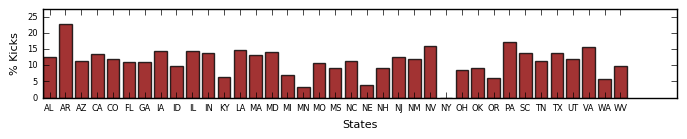

In [117]:
cars_usa_states = sorted(df['VNST'].unique())

xtab_states_badbuy = pd.crosstab(df['VNST'],df['IsBadBuy'])

nGoodBuyStates = xtab_states_badbuy[xtab_states_badbuy.columns[0]].values
nBadBuyStates = xtab_states_badbuy[xtab_states_badbuy.columns[1]].values

goodBuyPercentage = []
badBuyPercentage = []

for (good, bad) in zip(nGoodBuyStates, nBadBuyStates):
    totalBuy = good + bad
    goodBuyPercentage.append(round((float(good) / float(totalBuy)) * 100, 2))
    badBuyPercentage.append(round((float(bad) / float(totalBuy)) * 100, 2))

#Plot Dimension
plt.figure(figsize=(7,1.5))
ax1 = plt.subplot(111)

# text on bars top
def autolabel(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom',fontsize=7)

index_x = np.arange(len(cars_usa_states))
bar_width = 0.8
opacity = 0.8

rects1 = ax1.bar(index_x, 
        badBuyPercentage, 
        bar_width,
        alpha=opacity,
        color='darkred',
        label='Bad Buy')

ax1.set_xlabel('States',fontsize=8)
ax1.set_ylabel('% Kicks',fontsize=8)
#ax1.set_title('% Kick USA States',fontsize=12)
ax1.set_xticks(index_x+(bar_width/2))
ax1.set_xticklabels(cars_usa_states)
ax1.set_ylim([0, (np.amax(badBuyPercentage))* 1.2])
ax1.tick_params(axis='x', labelsize=6)
ax1.tick_params(axis='y', labelsize=6)

#autolabel(rects1,ax1)

#plt.grid()
plt.tight_layout()

#save plot image
plt.savefig('saved_plots/plots_states_histogram.png')

plt.show()

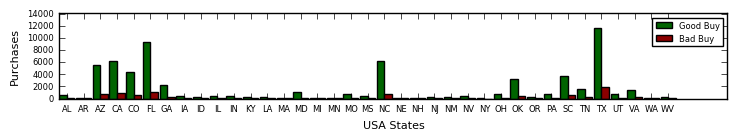

In [124]:
cars_usa_states = sorted(df['VNST'].unique())

xtab_states_badbuy = pd.crosstab(df['VNST'],df['IsBadBuy'])

nGoodBuyStates = xtab_states_badbuy[xtab_states_badbuy.columns[0]].values
nBadBuyStates = xtab_states_badbuy[xtab_states_badbuy.columns[1]].values

#Plot Dimension
plt.figure(figsize=(7.5,1.5))
ax1 = plt.subplot(111)

# text on bars top
def autolabel(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom',fontsize=7)
        

# SubPlot 1 - Kicks for USA States
index_x_1 = np.arange(len(cars_usa_states))
bar_width_1 = 0.45
opacity_1 = 1

# Good Buy Bar
rects1 = ax1.bar(
    index_x_1, 
    nGoodBuyStates, 
    bar_width_1,
    alpha=opacity_1,
    color='darkgreen',
    label='Good Buy')

# Bad Buy Bar
rects2 = ax1.bar(
    index_x_1+bar_width_1,
    nBadBuyStates,
    bar_width_1,
    alpha=opacity_1,
    color='darkred',
    label='Bad Buy')

ax1.set_xlabel('USA States',fontsize=8)
ax1.set_ylabel('Purchases',fontsize=8)
#ax1.set_title('Purchases for Odometer ranges',fontsize=12)
ax1.set_xticks(index_x_1+bar_width_1)
ax1.set_xticklabels(cars_usa_states)
ax1.set_ylim([0, (np.amax(nGoodBuyStates))* 1.2])
ax1.tick_params(axis='x', labelsize=6)
ax1.tick_params(axis='y', labelsize=6)
ax1.legend((rects1[0], rects2[0]), ('Good Buy', 'Bad Buy'), fontsize=6)
#ax1.set_axis_bgcolor('lightgrey')

#autolabel(rects1,ax1)

#plt.grid()
plt.tight_layout()

#save plot image
plt.savefig('saved_plots/plots_states_histogram_goodbadbuy.png')

plt.show()

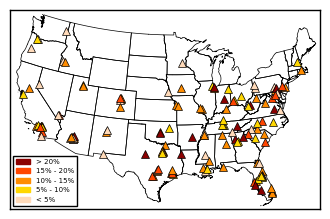

In [5]:
#Percentage Risk for zone of each state

#Map Configuration
plt.figure(figsize=(4,4))

#Create the blank map of USA
map = Basemap(
    llcrnrlon=-119,
    llcrnrlat=22,
    urcrnrlon=-64,
    urcrnrlat=49,
    projection='lcc',
    lat_1=33,
    lat_2=45,
    lon_0=-95)

#load the shapefile, use the name 'states'
#Shapefile contains coordinates of each state
map.readshapefile("usa_maps/st99_d00", name='states', drawbounds=True)

# collect the state names from the shapefile attributes so we can
# look up the shape obect for a state by it's name
state_names = []
for shape_dict in map.states_info:
    state_names.append(shape_dict['NAME'])

#m.bluemarble() #nasa blue marple

#get current axes instance
ax = plt.gca()

#DATA
state_zipcodes = sorted(df['VNZIP1'].unique())
xtab_zipcode_badbuy = pd.crosstab(df['VNZIP1'],df['IsBadBuy'])

nGoodBuyZipCode = xtab_zipcode_badbuy[xtab_zipcode_badbuy.columns[0]].values
nBadBuyZipCode = xtab_zipcode_badbuy[xtab_zipcode_badbuy.columns[1]].values

goodBuyPercentage = []
badBuyPercentage = []

for (good, bad) in zip(nGoodBuyZipCode, nBadBuyZipCode):
    totalBuy = good + bad
    #round(number,decimalsWanted)
    goodBuyPercentage.append(round((float(good) / float(totalBuy)) * 100, 2))
    badBuyPercentage.append(round((float(bad) / float(totalBuy)) * 100, 2))
    
for (item, good, bad) in zip(state_zipcodes, goodBuyPercentage, badBuyPercentage):
        
    #search by zipcode with USZipCode Library
    zipcode = search.by_zipcode(item)
            
    if zipcode.City is not None:
    
        #extract longitude and latitude
        lon = zipcode.Longitude
        lat = zipcode.Latitude
        x,y = map(lon,lat)   
            
        #determine "Bad Buy" percentage range of a city and print a colored point on map
        
        if bad < 5:    
            map.plot(x,y,color='peachpuff',marker='^',markersize=6)
        elif 5 <= bad < 10:
            map.plot(x,y,color='gold',marker='^',markersize=6)
        elif 10 <= bad < 15:
            map.plot(x,y,color='darkorange',marker='^',markersize=6)
        elif 15 <= bad < 20:
            map.plot(x,y,color='orangered',marker='^',markersize=6)
        elif bad >= 20:
            map.plot(x,y,color='darkred',marker='^',markersize=6)
            
#Legend
dark_red_patch = mpatches.Patch(color='darkred', label='> 20%')
orangered_patch = mpatches.Patch(color='orangered', label='15% - 20%')
darkorange_patch = mpatches.Patch(color='darkorange', label='10% - 15%')
gold_patch = mpatches.Patch(color='gold', label='5% - 10%')
peachpuff_patch = mpatches.Patch(color='peachpuff', label='< 5%')

plt.legend(
    #title="Legend",
    loc=3,  #location lower left
    handles=[
        dark_red_patch,
        orangered_patch,
        darkorange_patch,
        gold_patch,
        peachpuff_patch
    ],
    fontsize=5)

#plt.title('% Kick for ZIPCODE')

#save plot image
plt.savefig('saved_plots/plots_zipcode_map.png')

plt.show()

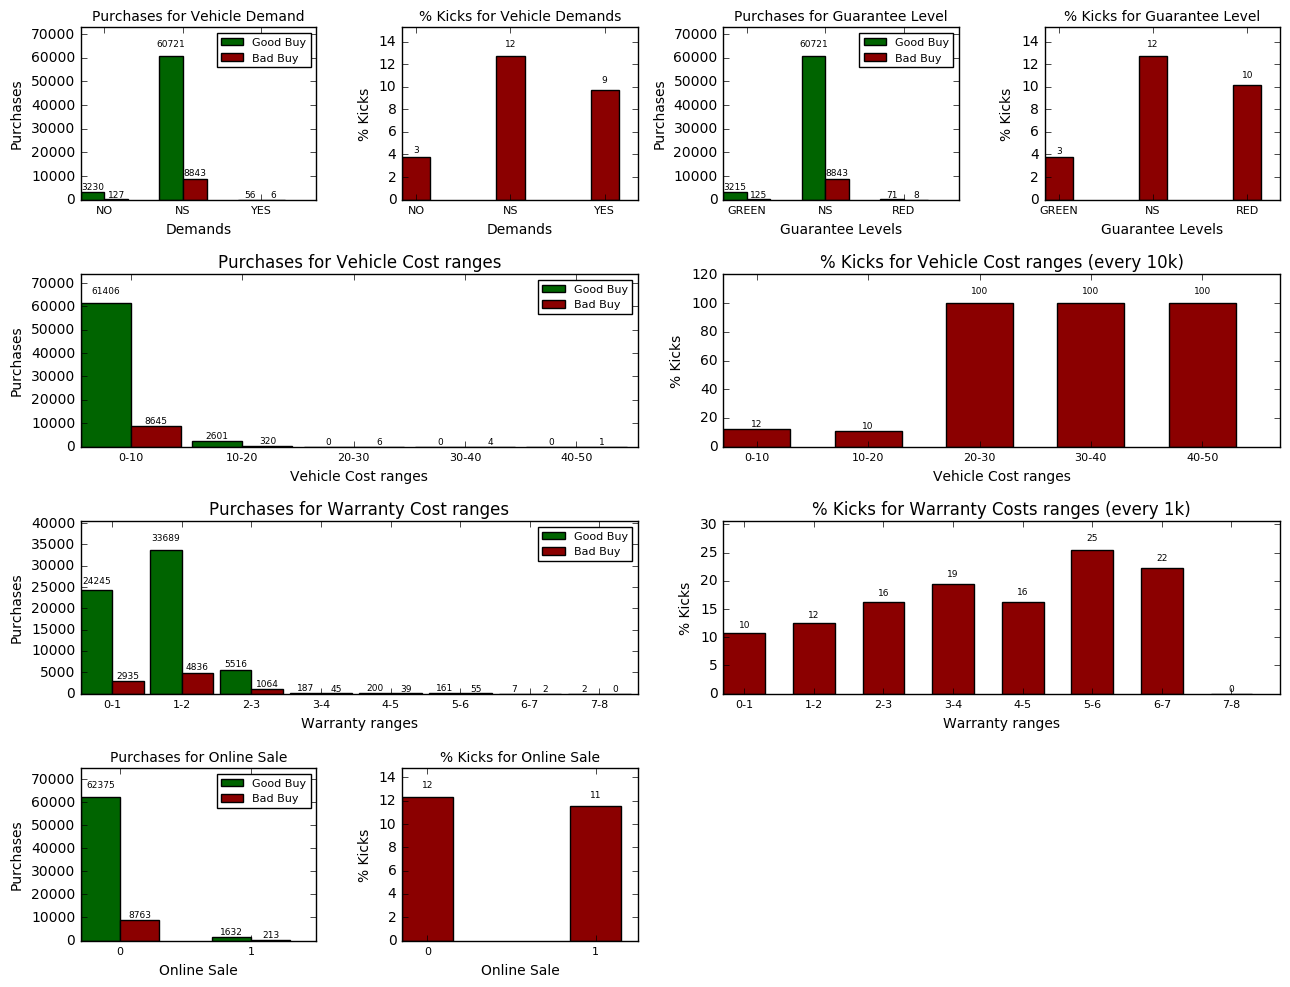

In [18]:
# Higher Demand Analysis (PRIMEUNIT) + Auction House Guarantee Level Analysis (AUCGUART)

demands = sorted(df['PRIMEUNIT'].unique())
#demands.remove('NS')
#dfDemands = df[df.PRIMEUNIT != 'NS']
xtab_demands_badbuy = pd.crosstab(df['PRIMEUNIT'], df['IsBadBuy'])
nDemandsBadBuy = xtab_demands_badbuy[1][:].tolist()
nDemandsGoodBuy = xtab_demands_badbuy[0][:].tolist()
demandsCounter = df['PRIMEUNIT'].value_counts().tolist()

guarantees = sorted(df['AUCGUART'].unique())
xtab_guarantees_badbuy = pd.crosstab(df['AUCGUART'], df['IsBadBuy'])
nGuaranteeBadBuy = xtab_guarantees_badbuy[1][:].tolist()
nGuaranteeGoodBuy = xtab_guarantees_badbuy[0][:].tolist()
guaranteeCounter = df['AUCGUART'].value_counts().tolist()

dfBadBuy = df[(df['IsBadBuy'] == 1)]
dfGoodBuy = df[(df['IsBadBuy']) == 0]

# Group Vehicle B Cost with 10k ranges
nGroupsVehBCostBadBuy = []
nGroupsVehBCostGoodBuy = []

# 0 - 10k
nGroupsVehBCostBadBuy.append(len(df.loc[(df['VehBCost'] >= 0) & (df['VehBCost'] < 10000) & (df['IsBadBuy'] == 1)].VehOdo))
nGroupsVehBCostGoodBuy.append(len(df.loc[(df['VehBCost'] >= 0) & (df['VehBCost'] < 10000) & (df['IsBadBuy'] == 0)].VehOdo))
# 10k - 20k
nGroupsVehBCostBadBuy.append(len(df.loc[(df['VehBCost'] >= 10000) & (df['VehBCost'] < 20000) & (df['IsBadBuy'] == 1)].VehOdo))
nGroupsVehBCostGoodBuy.append(len(df.loc[(df['VehBCost'] >= 10000) & (df['VehBCost'] < 20000) & (df['IsBadBuy'] == 0)].VehOdo))
# 20k - 30k
nGroupsVehBCostBadBuy.append(len(df.loc[(df['VehBCost'] >= 20000) & (df['VehBCost'] < 30000) & (df['IsBadBuy'] == 1)].VehOdo))
nGroupsVehBCostGoodBuy.append(len(df.loc[(df['VehBCost'] >= 20000) & (df['VehBCost'] < 30000) & (df['IsBadBuy'] == 0)].VehOdo))
# 30k - 40k
nGroupsVehBCostBadBuy.append(len(df.loc[(df['VehBCost'] >= 30000) & (df['VehBCost'] < 40000) & (df['IsBadBuy'] == 1)].VehOdo))
nGroupsVehBCostGoodBuy.append(len(df.loc[(df['VehBCost'] >= 30000) & (df['VehBCost'] < 40000) & (df['IsBadBuy'] == 0)].VehOdo))
# 40k - 50k
nGroupsVehBCostBadBuy.append(len(df.loc[(df['VehBCost'] >= 40000) & (df['VehBCost'] < 50000) & (df['IsBadBuy'] == 1)].VehOdo))
nGroupsVehBCostGoodBuy.append(len(df.loc[(df['VehBCost'] >= 40000) & (df['VehBCost'] < 50000) & (df['IsBadBuy'] == 0)].VehOdo))

rangesCost = ['0-10','10-20','20-30','30-40','40-50']

# Group Warranty Cost with 1k ranges
nGroupsWarrantyBadBuy = []
nGroupsWarrantyGoodBuy = []

# 0 - 1k
nGroupsWarrantyBadBuy.append(len(df.loc[(df['WarrantyCost'] >= 0) & (df['WarrantyCost'] < 1000) & (df['IsBadBuy'] == 1)].WarrantyCost))
nGroupsWarrantyGoodBuy.append(len(df.loc[(df['WarrantyCost'] >= 0) & (df['WarrantyCost'] < 1000) & (df['IsBadBuy'] == 0)].WarrantyCost))
# 1k - 2k
nGroupsWarrantyBadBuy.append(len(df.loc[(df['WarrantyCost'] >= 1000) & (df['WarrantyCost'] < 2000) & (df['IsBadBuy'] == 1)].WarrantyCost))
nGroupsWarrantyGoodBuy.append(len(df.loc[(df['WarrantyCost'] >= 1000) & (df['WarrantyCost'] < 2000) & (df['IsBadBuy'] == 0)].WarrantyCost))
# 2k - 3k
nGroupsWarrantyBadBuy.append(len(df.loc[(df['WarrantyCost'] >= 2000) & (df['WarrantyCost'] < 3000) & (df['IsBadBuy'] == 1)].WarrantyCost))
nGroupsWarrantyGoodBuy.append(len(df.loc[(df['WarrantyCost'] >= 2000) & (df['WarrantyCost'] < 3000) & (df['IsBadBuy'] == 0)].WarrantyCost))
# 3k - 4k
nGroupsWarrantyBadBuy.append(len(df.loc[(df['WarrantyCost'] >= 3000) & (df['WarrantyCost'] < 4000) & (df['IsBadBuy'] == 1)].WarrantyCost))
nGroupsWarrantyGoodBuy.append(len(df.loc[(df['WarrantyCost'] >= 3000) & (df['WarrantyCost'] < 4000) & (df['IsBadBuy'] == 0)].WarrantyCost))
# 4k - 5k
nGroupsWarrantyBadBuy.append(len(df.loc[(df['WarrantyCost'] >= 4000) & (df['WarrantyCost'] < 5000) & (df['IsBadBuy'] == 1)].WarrantyCost))
nGroupsWarrantyGoodBuy.append(len(df.loc[(df['WarrantyCost'] >= 4000) & (df['WarrantyCost'] < 5000) & (df['IsBadBuy'] == 0)].WarrantyCost))
# 5k - 6k
nGroupsWarrantyBadBuy.append(len(df.loc[(df['WarrantyCost'] >= 5000) & (df['WarrantyCost'] < 6000) & (df['IsBadBuy'] == 1)].WarrantyCost))
nGroupsWarrantyGoodBuy.append(len(df.loc[(df['WarrantyCost'] >= 5000) & (df['WarrantyCost'] < 6000) & (df['IsBadBuy'] == 0)].WarrantyCost))
# 6k - 7k
nGroupsWarrantyBadBuy.append(len(df.loc[(df['WarrantyCost'] >= 6000) & (df['WarrantyCost'] < 7000) & (df['IsBadBuy'] == 1)].WarrantyCost))
nGroupsWarrantyGoodBuy.append(len(df.loc[(df['WarrantyCost'] >= 6000) & (df['WarrantyCost'] < 7000) & (df['IsBadBuy'] == 0)].WarrantyCost))
# 7k - 8k
nGroupsWarrantyBadBuy.append(len(df.loc[(df['WarrantyCost'] >= 7000) & (df['WarrantyCost'] < 8000) & (df['IsBadBuy'] == 1)].WarrantyCost))
nGroupsWarrantyGoodBuy.append(len(df.loc[(df['WarrantyCost'] >= 7000) & (df['WarrantyCost'] < 8000) & (df['IsBadBuy'] == 0)].WarrantyCost))

rangesWarranty = ['0-1','1-2','2-3','3-4','4-5','5-6','6-7','7-8']

onlineSales = sorted(df['IsOnlineSale'].unique())
xtab_onlinesales_badbuy = pd.crosstab(df['IsOnlineSale'], df['IsBadBuy'])
nOnlinesalesBadBuy = xtab_onlinesales_badbuy[1][:].tolist()
nOnlinesalesGoodBuy = xtab_onlinesales_badbuy[0][:].tolist()
onlinesalesCounter = df['IsOnlineSale'].value_counts().tolist()

warrantycosts = sorted(df['WarrantyCost'].unique())
xtab_warranty_badbuy = pd.crosstab(df['WarrantyCost'], df['IsBadBuy'])
nWarrantyBadBuy = xtab_warranty_badbuy[1][:].tolist()
nWarrantyGoodBuy = xtab_warranty_badbuy[0][:].tolist()
warrantyCounter = df['WarrantyCost'].value_counts().tolist()
    
# Plot Settings
fig = plt.figure(figsize=(13,10))
ax1 = plt.subplot2grid((4,4), (0,0))
ax2 = plt.subplot2grid((4,4), (0,1))
ax3 = plt.subplot2grid((4,4), (0,2))
ax4 = plt.subplot2grid((4,4), (0,3))
ax5 = plt.subplot2grid((4,4), (1,0), colspan=2)
ax6 = plt.subplot2grid((4,4), (1,2), colspan=2)
ax7 = plt.subplot2grid((4,4), (2,0), colspan=2)
ax8 = plt.subplot2grid((4,4), (2,2), colspan=2)
ax9 = plt.subplot2grid((4,4), (3,0))
ax10 = plt.subplot2grid((4,4), (3,1))

# text on bars top
def autolabel(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom',fontsize=6.5)

# SubPlot 1 - Kicks for Vehicle Demands
index_x_1 = np.arange(len(demands))
bar_width_1 = 0.30
opacity_1 = 1

# Good Buy Bar
rects1 = ax1.bar(
    index_x_1, 
    nDemandsGoodBuy, 
    bar_width_1,
    alpha=opacity_1,
    color='darkgreen',
    label='Good Buy')

# Bad Buy Bar
rects2 = ax1.bar(
    index_x_1+bar_width_1,
    nDemandsBadBuy,
    bar_width_1,
    alpha=opacity_1,
    color='darkred',
    label='Bad Buy')

ax1.set_xlabel('Demands',fontsize=10)
ax1.set_ylabel('Purchases',fontsize=10)
ax1.set_title('Purchases for Vehicle Demand',fontsize=10)
ax1.set_xticks(index_x_1+bar_width_1)
ax1.set_xticklabels(demands)
ax1.set_ylim([0, (np.amax(nDemandsGoodBuy))* 1.2])
ax1.tick_params(axis='x', labelsize=8)
ax1.tick_params(axis='y', labelsize=10)
ax1.legend((rects1[0], rects2[0]), ('Good Buy', 'Bad Buy'), fontsize=8)
#ax1.set_axis_bgcolor('lightgrey')

autolabel(rects1,ax1)
autolabel(rects2,ax1)

# SubPlot 2 - % Kick for Vehicle Demands
demandsGoodBuyPercentage = []
demandsBadBuyPercentage = []

for (good, bad) in zip(nDemandsGoodBuy, nDemandsBadBuy):
    totalBuy = good + bad
    demandsGoodBuyPercentage.append(round((float(good) / float(totalBuy)) * 100, 2))
    demandsBadBuyPercentage.append(round((float(bad) / float(totalBuy)) * 100, 2))

index_x_2 = np.arange(len(demands))
bar_width_2 = 0.30
opacity_2 = 1

# Bad Buy Bar
rects1 = ax2.bar(
    index_x_2,
    demandsBadBuyPercentage,
    bar_width_2,
    alpha=opacity_2,
    color='darkred',
    label='% Bad Buy')

ax2.set_xlabel('Demands',fontsize=10)
ax2.set_ylabel('% Kicks',fontsize=10)
ax2.set_title('% Kicks for Vehicle Demands',fontsize=10)
ax2.set_xticks(index_x_2+(bar_width_2/2))
ax2.set_xticklabels(demands)
ax2.set_ylim([0, (np.amax(demandsBadBuyPercentage))* 1.2])
ax2.tick_params(axis='x', labelsize=8)
ax2.tick_params(axis='y', labelsize=10)
#ax1.set_axis_bgcolor('lightgrey')

autolabel(rects1,ax2)

# SubPlot 3 - Kicks for Auction House Guarantee Level
index_x_3 = np.arange(len(guarantees))
bar_width_3 = 0.30
opacity_3 = 1

# Good Buy Bar
rects1 = ax3.bar(
    index_x_3, 
    nGuaranteeGoodBuy, 
    bar_width_3,
    alpha=opacity_3,
    color='darkgreen',
    label='Good Buy')

# Bad Buy Bar
rects2 = ax3.bar(
    index_x_3+bar_width_3,
    nGuaranteeBadBuy,
    bar_width_3,
    alpha=opacity_3,
    color='darkred',
    label='Bad Buy')

ax3.set_xlabel('Guarantee Levels',fontsize=10)
ax3.set_ylabel('Purchases',fontsize=10)
ax3.set_title('Purchases for Guarantee Level',fontsize=10)
ax3.set_xticks(index_x_3+bar_width_3)
ax3.set_xticklabels(guarantees)
ax3.set_ylim([0, (np.amax(nGuaranteeGoodBuy))* 1.2])
ax3.tick_params(axis='x', labelsize=8)
ax3.tick_params(axis='y', labelsize=10)
ax3.legend((rects1[0], rects2[0]), ('Good Buy', 'Bad Buy'), fontsize=8)
#ax3.set_axis_bgcolor('lightgrey')

autolabel(rects1,ax3)
autolabel(rects2,ax3)

# SubPlot 4 - % Kick for Guarantee Level
guaranteeGoodBuyPercentage = []
guaranteeBadBuyPercentage = []

for (good, bad) in zip(nGuaranteeGoodBuy, nGuaranteeBadBuy):
    totalBuy = good + bad
    guaranteeGoodBuyPercentage.append(round((float(good) / float(totalBuy)) * 100, 2))
    guaranteeBadBuyPercentage.append(round((float(bad) / float(totalBuy)) * 100, 2))

index_x_4 = np.arange(len(guarantees))
bar_width_4 = 0.30
opacity_4 = 1

# Bad Buy Bar
rects1 = ax4.bar(
    index_x_4,
    guaranteeBadBuyPercentage,
    bar_width_4,
    alpha=opacity_4,
    color='darkred',
    label='% Bad Buy')

ax4.set_xlabel('Guarantee Levels',fontsize=10)
ax4.set_ylabel('% Kicks',fontsize=10)
ax4.set_title('% Kicks for Guarantee Level',fontsize=10)
ax4.set_xticks(index_x_4+(bar_width_4/2))
ax4.set_xticklabels(guarantees)
ax4.set_ylim([0, (np.amax(guaranteeBadBuyPercentage))* 1.2])
ax4.tick_params(axis='x', labelsize=8)
ax4.tick_params(axis='y', labelsize=10)
#ax4.set_axis_bgcolor('lightgrey')

autolabel(rects1,ax4)

# SubPlot 5 - Vehicle Purchase Cost
index_x_5 = np.arange(len(rangesCost))
bar_width_5 = 0.45
opacity_5 = 1

# Good Buy Bar
rects1 = ax5.bar(
    index_x_5, 
    nGroupsVehBCostGoodBuy, 
    bar_width_5,
    alpha=opacity_5,
    color='darkgreen',
    label='Good Buy')

# Bad Buy Bar
rects2 = ax5.bar(
    index_x_5+bar_width_5,
    nGroupsVehBCostBadBuy,
    bar_width_5,
    alpha=opacity_5,
    color='darkred',
    label='Bad Buy')

ax5.set_xlabel('Vehicle Cost ranges',fontsize=10)
ax5.set_ylabel('Purchases',fontsize=10)
ax5.set_title('Purchases for Vehicle Cost ranges',fontsize=12)
ax5.set_xticks(index_x_5+bar_width_5)
ax5.set_xticklabels(rangesCost)
ax5.set_ylim([0, (np.amax(nGroupsVehBCostGoodBuy))* 1.2])
ax5.tick_params(axis='x', labelsize=8)
ax5.tick_params(axis='y', labelsize=10)
ax5.legend((rects1[0], rects2[0]), ('Good Buy', 'Bad Buy'), fontsize=8)
#ax5.set_axis_bgcolor('lightgrey')

autolabel(rects1,ax5)
autolabel(rects2,ax5)

# SubPlot 6 - % Kicks Vehicle Cost ranges
# % Bad Buy
nPercentageVehBCostBadBuys = []
nPercentageVehBCostGoodBuy = []
for (good, bad) in zip(nGroupsVehBCostGoodBuy, nGroupsVehBCostBadBuy):
    totalBuy = good + bad
    nPercentageVehBCostGoodBuy.append(round((float(good) / float(totalBuy)) * 100, 2))
    nPercentageVehBCostBadBuys.append(round((float(bad) / float(totalBuy)) * 100, 2))
    
index_x_6 = np.arange(len(rangesCost))
bar_width_6 = 0.6
opacity_6 = 1

# Bad Buy Bar
rects1 = ax6.bar(
    index_x_6,
    nPercentageVehBCostBadBuys,
    bar_width_6,
    alpha=opacity_6,
    color='darkred',
    label='% Bad Buy')

ax6.set_xlabel('Vehicle Cost ranges',fontsize=10)
ax6.set_ylabel('% Kicks',fontsize=10)
ax6.set_title('% Kicks for Vehicle Cost ranges (every 10k)',fontsize=12)
ax6.set_xticks(index_x_6+(bar_width_6/2))
ax6.set_xticklabels(rangesCost)
ax6.set_ylim([0, (np.amax(nPercentageVehBCostBadBuys))* 1.2])
ax6.tick_params(axis='x', labelsize=8)
ax6.tick_params(axis='y', labelsize=10)
#ax1.set_axis_bgcolor('lightgrey')

autolabel(rects1,ax6)

# SubPlot 7 - Warranty Cost ranges
index_x_7 = np.arange(len(rangesWarranty))
bar_width_7 = 0.45
opacity_7 = 1

# Good Buy Bar
rects1 = ax7.bar(
    index_x_7, 
    nGroupsWarrantyGoodBuy, 
    bar_width_7,
    alpha=opacity_7,
    color='darkgreen',
    label='Good Buy')

# Bad Buy Bar
rects2 = ax7.bar(
    index_x_7+bar_width_7,
    nGroupsWarrantyBadBuy,
    bar_width_7,
    alpha=opacity_7,
    color='darkred',
    label='Bad Buy')

ax7.set_xlabel('Warranty ranges',fontsize=10)
ax7.set_ylabel('Purchases',fontsize=10)
ax7.set_title('Purchases for Warranty Cost ranges',fontsize=12)
ax7.set_xticks(index_x_7+bar_width_7)
ax7.set_xticklabels(rangesWarranty)
ax7.set_ylim([0, (np.amax(nGroupsWarrantyGoodBuy))* 1.2])
ax7.tick_params(axis='x', labelsize=8)
ax7.tick_params(axis='y', labelsize=10)
ax7.legend((rects1[0], rects2[0]), ('Good Buy', 'Bad Buy'), fontsize=8)
#ax5.set_axis_bgcolor('lightgrey')

autolabel(rects1,ax7)
autolabel(rects2,ax7)

# SubPlot 8 - % Kicks Warranty Cost ranges
# % Bad Buy
nPercentageWarrantyBadBuys = []
nPercentageWarrantyGoodBuy = []
for (good, bad) in zip(nGroupsWarrantyGoodBuy, nGroupsWarrantyBadBuy):
    totalBuy = good + bad
    nPercentageWarrantyGoodBuy.append(round((float(good) / float(totalBuy)) * 100, 2))
    nPercentageWarrantyBadBuys.append(round((float(bad) / float(totalBuy)) * 100, 2))
    
index_x_8 = np.arange(len(rangesWarranty))
bar_width_8 = 0.6
opacity_8 = 1

# Bad Buy Bar
rects1 = ax8.bar(
    index_x_8,
    nPercentageWarrantyBadBuys,
    bar_width_8,
    alpha=opacity_8,
    color='darkred',
    label='% Bad Buy')

ax8.set_xlabel('Warranty ranges',fontsize=10)
ax8.set_ylabel('% Kicks',fontsize=10)
ax8.set_title('% Kicks for Warranty Costs ranges (every 1k)',fontsize=12)
ax8.set_xticks(index_x_8+(bar_width_8/2))
ax8.set_xticklabels(rangesWarranty)
ax8.set_ylim([0, (np.amax(nPercentageWarrantyBadBuys))* 1.2])
ax8.tick_params(axis='x', labelsize=8)
ax8.tick_params(axis='y', labelsize=10)
#ax1.set_axis_bgcolor('lightgrey')

autolabel(rects1,ax8)

# SubPlot 9 - Purchases for Online Sales
index_x_9 = np.arange(len(onlineSales))
bar_width_9 = 0.30
opacity_9 = 1

# Good Buy Bar
rects1 = ax9.bar(
    index_x_9, 
    nOnlinesalesGoodBuy, 
    bar_width_9,
    alpha=opacity_9,
    color='darkgreen',
    label='Good Buy')

# Bad Buy Bar
rects2 = ax9.bar(
    index_x_9+bar_width_9,
    nOnlinesalesBadBuy,
    bar_width_9,
    alpha=opacity_9,
    color='darkred',
    label='Bad Buy')

ax9.set_xlabel('Online Sale',fontsize=10)
ax9.set_ylabel('Purchases',fontsize=10)
ax9.set_title('Purchases for Online Sale',fontsize=10)
ax9.set_xticks(index_x_9+bar_width_9)
ax9.set_xticklabels(onlineSales)
ax9.set_ylim([0, (np.amax(nOnlinesalesGoodBuy))* 1.2])
ax9.tick_params(axis='x', labelsize=8)
ax9.tick_params(axis='y', labelsize=10)
ax9.legend((rects1[0], rects2[0]), ('Good Buy', 'Bad Buy'), fontsize=8)
#ax9.set_axis_bgcolor('lightgrey')

autolabel(rects1,ax9)
autolabel(rects2,ax9)

# SubPlot 10 - % Kick for Online Sales
onlineSalesGoodBuyPercentage = []
onlineSalesBadBuyPercentage = []

for (good, bad) in zip(nOnlinesalesGoodBuy, nOnlinesalesBadBuy):
    totalBuy = good + bad
    onlineSalesGoodBuyPercentage.append(round((float(good) / float(totalBuy)) * 100, 2))
    onlineSalesBadBuyPercentage.append(round((float(bad) / float(totalBuy)) * 100, 2))

index_x_10 = np.arange(len(onlineSales))
bar_width_10 = 0.30
opacity_10 = 1

# Bad Buy Bar
rects1 = ax10.bar(
    index_x_10,
    onlineSalesBadBuyPercentage,
    bar_width_10,
    alpha=opacity_10,
    color='darkred',
    label='% Bad Buy')

ax10.set_xlabel('Online Sale',fontsize=10)
ax10.set_ylabel('% Kicks',fontsize=10)
ax10.set_title('% Kicks for Online Sale',fontsize=10)
ax10.set_xticks(index_x_9+(bar_width_9/2))
ax10.set_xticklabels(onlineSales)
ax10.set_ylim([0, (np.amax(onlineSalesBadBuyPercentage))* 1.2])
ax10.tick_params(axis='x', labelsize=8)
ax10.tick_params(axis='y', labelsize=10)
#ax10.set_axis_bgcolor('lightgrey')

autolabel(rects1,ax10)

plt.tight_layout()
plt.savefig('saved_plots/plots_demand_guarantee_vehCost_warranty_onlineSale.png')
plt.show()

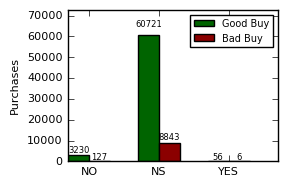

In [10]:
demands = sorted(df['PRIMEUNIT'].unique())
#demands.remove('NS')
#dfDemands = df[df.PRIMEUNIT != 'NS']
xtab_demands_badbuy = pd.crosstab(df['PRIMEUNIT'], df['IsBadBuy'])
nDemandsBadBuy = xtab_demands_badbuy[1][:].tolist()
nDemandsGoodBuy = xtab_demands_badbuy[0][:].tolist()
demandsCounter = df['PRIMEUNIT'].value_counts().tolist()

# text on bars top
def autolabel(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom',fontsize=6)

fig = plt.figure(figsize=(3,2))
ax1 = plt.subplot(111)

# SubPlot 1 - Kicks for Vehicle Demands
index_x_1 = np.arange(len(demands))
bar_width_1 = 0.30
opacity_1 = 1

# Good Buy Bar
rects1 = ax1.bar(
    index_x_1, 
    nDemandsGoodBuy, 
    bar_width_1,
    alpha=opacity_1,
    color='darkgreen',
    label='Good Buy')

# Bad Buy Bar
rects2 = ax1.bar(
    index_x_1+bar_width_1,
    nDemandsBadBuy,
    bar_width_1,
    alpha=opacity_1,
    color='darkred',
    label='Bad Buy')

#ax1.set_xlabel('Demands',fontsize=8)
ax1.set_ylabel('Purchases',fontsize=8)
#ax1.set_title('Purchases for Vehicle Demand',fontsize=10)
ax1.set_xticks(index_x_1+bar_width_1)
ax1.set_xticklabels(demands)
ax1.set_ylim([0, (np.amax(nDemandsGoodBuy))* 1.2])
ax1.tick_params(axis='x', labelsize=8)
ax1.tick_params(axis='y', labelsize=8)
ax1.legend((rects1[0], rects2[0]), ('Good Buy', 'Bad Buy'), fontsize=7)
#ax1.set_axis_bgcolor('lightgrey')

autolabel(rects1,ax1)
autolabel(rects2,ax1)

plt.tight_layout()

# Save plot image
plt.savefig('saved_plots/plots_primeunit_goodbadbuy.png')

plt.show()

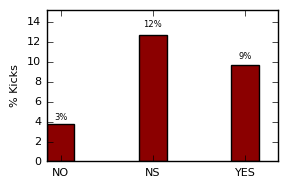

In [14]:
# text on bars top
def autolabel_percentage(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height)+'%',
                ha='center', va='bottom',fontsize=6)

fig = plt.figure(figsize=(3,2))
ax2 = plt.subplot(111)

# SubPlot 2 - % Kick for Vehicle Demands
demandsGoodBuyPercentage = []
demandsBadBuyPercentage = []

for (good, bad) in zip(nDemandsGoodBuy, nDemandsBadBuy):
    totalBuy = good + bad
    demandsGoodBuyPercentage.append(round((float(good) / float(totalBuy)) * 100, 2))
    demandsBadBuyPercentage.append(round((float(bad) / float(totalBuy)) * 100, 2))

index_x_2 = np.arange(len(demands))
bar_width_2 = 0.30
opacity_2 = 1

# Bad Buy Bar
rects1 = ax2.bar(
    index_x_2,
    demandsBadBuyPercentage,
    bar_width_2,
    alpha=opacity_2,
    color='darkred',
    label='% Bad Buy')

#ax2.set_xlabel('Demands',fontsize=8)
ax2.set_ylabel('% Kicks',fontsize=8)
#ax2.set_title('% Kicks for Vehicle Demands',fontsize=10)
ax2.set_xticks(index_x_2+(bar_width_2/2))
ax2.set_xticklabels(demands)
ax2.set_ylim([0, (np.amax(demandsBadBuyPercentage))* 1.2])
ax2.tick_params(axis='x', labelsize=8)
ax2.tick_params(axis='y', labelsize=8)
#ax1.set_axis_bgcolor('lightgrey')

autolabel_percentage(rects1,ax2)

plt.tight_layout()

# Save plot image
plt.savefig('saved_plots/plots_primeunit_kicks.png')

plt.show()

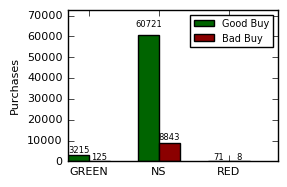

In [21]:
guarantees = sorted(df['AUCGUART'].unique())
xtab_guarantees_badbuy = pd.crosstab(df['AUCGUART'], df['IsBadBuy'])
nGuaranteeBadBuy = xtab_guarantees_badbuy[1][:].tolist()
nGuaranteeGoodBuy = xtab_guarantees_badbuy[0][:].tolist()
guaranteeCounter = df['AUCGUART'].value_counts().tolist()

# text on bars top
def autolabel(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom',fontsize=6)

fig = plt.figure(figsize=(3,2))
ax3 = plt.subplot(111)

# SubPlot 3 - Kicks for Auction House Guarantee Level
index_x_3 = np.arange(len(guarantees))
bar_width_3 = 0.30
opacity_3 = 1

# Good Buy Bar
rects1 = ax3.bar(
    index_x_3, 
    nGuaranteeGoodBuy, 
    bar_width_3,
    alpha=opacity_3,
    color='darkgreen',
    label='Good Buy')

# Bad Buy Bar
rects2 = ax3.bar(
    index_x_3+bar_width_3,
    nGuaranteeBadBuy,
    bar_width_3,
    alpha=opacity_3,
    color='darkred',
    label='Bad Buy')

#ax3.set_xlabel('Guarantee Levels',fontsize=8)
ax3.set_ylabel('Purchases',fontsize=8)
#ax3.set_title('Purchases for Guarantee Level',fontsize=10)
ax3.set_xticks(index_x_3+bar_width_3)
ax3.set_xticklabels(guarantees)
ax3.set_ylim([0, (np.amax(nGuaranteeGoodBuy))* 1.2])
ax3.tick_params(axis='x', labelsize=8)
ax3.tick_params(axis='y', labelsize=8)
ax3.legend((rects1[0], rects2[0]), ('Good Buy', 'Bad Buy'), fontsize=7)
#ax3.set_axis_bgcolor('lightgrey')

autolabel(rects1,ax3)
autolabel(rects2,ax3)

plt.tight_layout()

# Save plot image
plt.savefig('saved_plots/plots_aucguart_goodbadbuy.png')

plt.show()

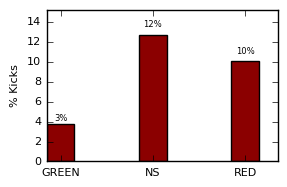

In [20]:
guarantees = sorted(df['AUCGUART'].unique())
xtab_guarantees_badbuy = pd.crosstab(df['AUCGUART'], df['IsBadBuy'])
nGuaranteeBadBuy = xtab_guarantees_badbuy[1][:].tolist()
nGuaranteeGoodBuy = xtab_guarantees_badbuy[0][:].tolist()
guaranteeCounter = df['AUCGUART'].value_counts().tolist()

# text on bars top
def autolabel_percentage(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height)+'%',
                ha='center', va='bottom',fontsize=6)

fig = plt.figure(figsize=(3,2))
ax4 = plt.subplot(111)

# SubPlot 4 - % Kick for Guarantee Level
guaranteeGoodBuyPercentage = []
guaranteeBadBuyPercentage = []

for (good, bad) in zip(nGuaranteeGoodBuy, nGuaranteeBadBuy):
    totalBuy = good + bad
    guaranteeGoodBuyPercentage.append(round((float(good) / float(totalBuy)) * 100, 2))
    guaranteeBadBuyPercentage.append(round((float(bad) / float(totalBuy)) * 100, 2))

index_x_4 = np.arange(len(guarantees))
bar_width_4 = 0.30
opacity_4 = 1

# Bad Buy Bar
rects1 = ax4.bar(
    index_x_4,
    guaranteeBadBuyPercentage,
    bar_width_4,
    alpha=opacity_4,
    color='darkred',
    label='% Bad Buy')

#ax4.set_xlabel('Guarantee Levels',fontsize=10)
ax4.set_ylabel('% Kicks',fontsize=8)
#ax4.set_title('% Kicks for Guarantee Level',fontsize=10)
ax4.set_xticks(index_x_4+(bar_width_4/2))
ax4.set_xticklabels(guarantees)
ax4.set_ylim([0, (np.amax(guaranteeBadBuyPercentage))* 1.2])
ax4.tick_params(axis='x', labelsize=8)
ax4.tick_params(axis='y', labelsize=8)
#ax4.set_axis_bgcolor('lightgrey')

autolabel_percentage(rects1,ax4)

plt.tight_layout()

# Save plot image
plt.savefig('saved_plots/plots_aucguart_kicks.png')

plt.show()

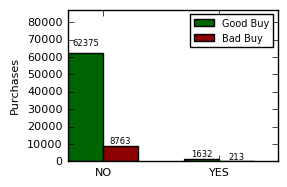

In [26]:
onlineSales = ['NO','YES']
xtab_onlinesales_badbuy = pd.crosstab(df['IsOnlineSale'], df['IsBadBuy'])
nOnlinesalesBadBuy = xtab_onlinesales_badbuy[1][:].tolist()
nOnlinesalesGoodBuy = xtab_onlinesales_badbuy[0][:].tolist()
onlinesalesCounter = df['IsOnlineSale'].value_counts().tolist()

# text on bars top
def autolabel(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom',fontsize=6)

fig = plt.figure(figsize=(3,2))
ax9 = plt.subplot(111)

# SubPlot 9 - Purchases for Online Sales
index_x_9 = np.arange(len(onlineSales))
bar_width_9 = 0.30
opacity_9 = 1

# Good Buy Bar
rects1 = ax9.bar(
    index_x_9, 
    nOnlinesalesGoodBuy, 
    bar_width_9,
    alpha=opacity_9,
    color='darkgreen',
    label='Good Buy')

# Bad Buy Bar
rects2 = ax9.bar(
    index_x_9+bar_width_9,
    nOnlinesalesBadBuy,
    bar_width_9,
    alpha=opacity_9,
    color='darkred',
    label='Bad Buy')

#ax9.set_xlabel('Online Sale',fontsize=10)
ax9.set_ylabel('Purchases',fontsize=8)
#ax9.set_title('Purchases for Online Sale',fontsize=10)
ax9.set_xticks(index_x_9+bar_width_9)
ax9.set_xticklabels(onlineSales)
ax9.set_ylim([0, (np.amax(nOnlinesalesGoodBuy))* 1.4])
ax9.tick_params(axis='x', labelsize=8)
ax9.tick_params(axis='y', labelsize=8)
ax9.legend((rects1[0], rects2[0]), ('Good Buy', 'Bad Buy'), fontsize=7)
#ax9.set_axis_bgcolor('lightgrey')

autolabel(rects1,ax9)
autolabel(rects2,ax9)

plt.tight_layout()

# Save plot image
plt.savefig('saved_plots/plots_isonlinesale_goodbadbuy.png')

plt.show()

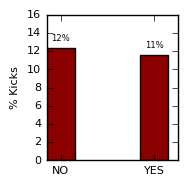

In [41]:
onlineSales = ['NO','YES']
xtab_onlinesales_badbuy = pd.crosstab(df['IsOnlineSale'], df['IsBadBuy'])
nOnlinesalesBadBuy = xtab_onlinesales_badbuy[1][:].tolist()
nOnlinesalesGoodBuy = xtab_onlinesales_badbuy[0][:].tolist()
onlinesalesCounter = df['IsOnlineSale'].value_counts().tolist()

# text on bars top
def autolabel_percentage(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height)+'%',
                ha='center', va='bottom',fontsize=6)

fig = plt.figure(figsize=(2,2))
ax10 = plt.subplot(111)

# SubPlot 10 - % Kick for Online Sales
onlineSalesGoodBuyPercentage = []
onlineSalesBadBuyPercentage = []

for (good, bad) in zip(nOnlinesalesGoodBuy, nOnlinesalesBadBuy):
    totalBuy = good + bad
    onlineSalesGoodBuyPercentage.append(round((float(good) / float(totalBuy)) * 100, 2))
    onlineSalesBadBuyPercentage.append(round((float(bad) / float(totalBuy)) * 100, 2))

index_x_10 = np.arange(len(onlineSales))
bar_width_10 = 0.30
opacity_10 = 1

# Bad Buy Bar
rects1 = ax10.bar(
    index_x_10,
    onlineSalesBadBuyPercentage,
    bar_width_10,
    alpha=opacity_10,
    color='darkred',
    label='% Bad Buy')

#ax10.set_xlabel('Online Sale',fontsize=8)
ax10.set_ylabel('% Kicks',fontsize=8)
#ax10.set_title('% Kicks for Online Sale',fontsize=10)
ax10.set_xticks(index_x_9+(bar_width_9/2))
ax10.set_xticklabels(onlineSales)
ax10.set_ylim([0, (np.amax(onlineSalesBadBuyPercentage))* 1.3])
ax10.tick_params(axis='x', labelsize=8)
ax10.tick_params(axis='y', labelsize=8)
#ax10.set_axis_bgcolor('lightgrey')

autolabel_percentage(rects1,ax10)

plt.tight_layout()

# Save plot image
plt.savefig('saved_plots/plots_isonlinesale_kicks.png')

plt.show()

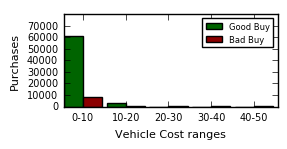

In [38]:
# Group Vehicle B Cost with 10k ranges
nGroupsVehBCostBadBuy = []
nGroupsVehBCostGoodBuy = []

# 0 - 10k
nGroupsVehBCostBadBuy.append(len(df.loc[(df['VehBCost'] >= 0) & (df['VehBCost'] < 10000) & (df['IsBadBuy'] == 1)].VehOdo))
nGroupsVehBCostGoodBuy.append(len(df.loc[(df['VehBCost'] >= 0) & (df['VehBCost'] < 10000) & (df['IsBadBuy'] == 0)].VehOdo))
# 10k - 20k
nGroupsVehBCostBadBuy.append(len(df.loc[(df['VehBCost'] >= 10000) & (df['VehBCost'] < 20000) & (df['IsBadBuy'] == 1)].VehOdo))
nGroupsVehBCostGoodBuy.append(len(df.loc[(df['VehBCost'] >= 10000) & (df['VehBCost'] < 20000) & (df['IsBadBuy'] == 0)].VehOdo))
# 20k - 30k
nGroupsVehBCostBadBuy.append(len(df.loc[(df['VehBCost'] >= 20000) & (df['VehBCost'] < 30000) & (df['IsBadBuy'] == 1)].VehOdo))
nGroupsVehBCostGoodBuy.append(len(df.loc[(df['VehBCost'] >= 20000) & (df['VehBCost'] < 30000) & (df['IsBadBuy'] == 0)].VehOdo))
# 30k - 40k
nGroupsVehBCostBadBuy.append(len(df.loc[(df['VehBCost'] >= 30000) & (df['VehBCost'] < 40000) & (df['IsBadBuy'] == 1)].VehOdo))
nGroupsVehBCostGoodBuy.append(len(df.loc[(df['VehBCost'] >= 30000) & (df['VehBCost'] < 40000) & (df['IsBadBuy'] == 0)].VehOdo))
# 40k - 50k
nGroupsVehBCostBadBuy.append(len(df.loc[(df['VehBCost'] >= 40000) & (df['VehBCost'] < 50000) & (df['IsBadBuy'] == 1)].VehOdo))
nGroupsVehBCostGoodBuy.append(len(df.loc[(df['VehBCost'] >= 40000) & (df['VehBCost'] < 50000) & (df['IsBadBuy'] == 0)].VehOdo))

rangesCost = ['0-10','10-20','20-30','30-40','40-50']

# text on bars top
def autolabel(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom',fontsize=6)

fig = plt.figure(figsize=(3,1.6))
ax5 = plt.subplot(111)

# SubPlot 5 - Vehicle Purchase Cost
index_x_5 = np.arange(len(rangesCost))
bar_width_5 = 0.45
opacity_5 = 1

# Good Buy Bar
rects1 = ax5.bar(
    index_x_5, 
    nGroupsVehBCostGoodBuy, 
    bar_width_5,
    alpha=opacity_5,
    color='darkgreen',
    label='Good Buy')

# Bad Buy Bar
rects2 = ax5.bar(
    index_x_5+bar_width_5,
    nGroupsVehBCostBadBuy,
    bar_width_5,
    alpha=opacity_5,
    color='darkred',
    label='Bad Buy')

ax5.set_xlabel('Vehicle Cost ranges',fontsize=8)
ax5.set_ylabel('Purchases',fontsize=8)
#ax5.set_title('Purchases for Vehicle Cost ranges',fontsize=12)
ax5.set_xticks(index_x_5+bar_width_5)
ax5.set_xticklabels(rangesCost)
ax5.set_ylim([0, (np.amax(nGroupsVehBCostGoodBuy))* 1.3])
ax5.tick_params(axis='x', labelsize=7)
ax5.tick_params(axis='y', labelsize=7)
ax5.legend((rects1[0], rects2[0]), ('Good Buy', 'Bad Buy'), fontsize=6)
#ax5.set_axis_bgcolor('lightgrey')

#autolabel(rects1,ax5)
#autolabel(rects2,ax5)

plt.tight_layout()

# Save plot image
plt.savefig('saved_plots/plots_vehcost_goodbadbuy.png')

plt.show()

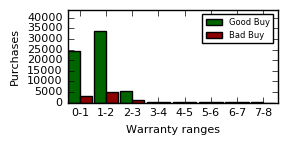

In [114]:
# Group Warranty Cost with 1k ranges
nGroupsWarrantyBadBuy = []
nGroupsWarrantyGoodBuy = []

# 0 - 1k
nGroupsWarrantyBadBuy.append(len(df.loc[(df['WarrantyCost'] >= 0) & (df['WarrantyCost'] < 1000) & (df['IsBadBuy'] == 1)].WarrantyCost))
nGroupsWarrantyGoodBuy.append(len(df.loc[(df['WarrantyCost'] >= 0) & (df['WarrantyCost'] < 1000) & (df['IsBadBuy'] == 0)].WarrantyCost))
# 1k - 2k
nGroupsWarrantyBadBuy.append(len(df.loc[(df['WarrantyCost'] >= 1000) & (df['WarrantyCost'] < 2000) & (df['IsBadBuy'] == 1)].WarrantyCost))
nGroupsWarrantyGoodBuy.append(len(df.loc[(df['WarrantyCost'] >= 1000) & (df['WarrantyCost'] < 2000) & (df['IsBadBuy'] == 0)].WarrantyCost))
# 2k - 3k
nGroupsWarrantyBadBuy.append(len(df.loc[(df['WarrantyCost'] >= 2000) & (df['WarrantyCost'] < 3000) & (df['IsBadBuy'] == 1)].WarrantyCost))
nGroupsWarrantyGoodBuy.append(len(df.loc[(df['WarrantyCost'] >= 2000) & (df['WarrantyCost'] < 3000) & (df['IsBadBuy'] == 0)].WarrantyCost))
# 3k - 4k
nGroupsWarrantyBadBuy.append(len(df.loc[(df['WarrantyCost'] >= 3000) & (df['WarrantyCost'] < 4000) & (df['IsBadBuy'] == 1)].WarrantyCost))
nGroupsWarrantyGoodBuy.append(len(df.loc[(df['WarrantyCost'] >= 3000) & (df['WarrantyCost'] < 4000) & (df['IsBadBuy'] == 0)].WarrantyCost))
# 4k - 5k
nGroupsWarrantyBadBuy.append(len(df.loc[(df['WarrantyCost'] >= 4000) & (df['WarrantyCost'] < 5000) & (df['IsBadBuy'] == 1)].WarrantyCost))
nGroupsWarrantyGoodBuy.append(len(df.loc[(df['WarrantyCost'] >= 4000) & (df['WarrantyCost'] < 5000) & (df['IsBadBuy'] == 0)].WarrantyCost))
# 5k - 6k
nGroupsWarrantyBadBuy.append(len(df.loc[(df['WarrantyCost'] >= 5000) & (df['WarrantyCost'] < 6000) & (df['IsBadBuy'] == 1)].WarrantyCost))
nGroupsWarrantyGoodBuy.append(len(df.loc[(df['WarrantyCost'] >= 5000) & (df['WarrantyCost'] < 6000) & (df['IsBadBuy'] == 0)].WarrantyCost))
# 6k - 7k
nGroupsWarrantyBadBuy.append(len(df.loc[(df['WarrantyCost'] >= 6000) & (df['WarrantyCost'] < 7000) & (df['IsBadBuy'] == 1)].WarrantyCost))
nGroupsWarrantyGoodBuy.append(len(df.loc[(df['WarrantyCost'] >= 6000) & (df['WarrantyCost'] < 7000) & (df['IsBadBuy'] == 0)].WarrantyCost))
# 7k - 8k
nGroupsWarrantyBadBuy.append(len(df.loc[(df['WarrantyCost'] >= 7000) & (df['WarrantyCost'] < 8000) & (df['IsBadBuy'] == 1)].WarrantyCost))
nGroupsWarrantyGoodBuy.append(len(df.loc[(df['WarrantyCost'] >= 7000) & (df['WarrantyCost'] < 8000) & (df['IsBadBuy'] == 0)].WarrantyCost))

rangesWarranty = ['0-1','1-2','2-3','3-4','4-5','5-6','6-7','7-8']

warrantycosts = sorted(df['WarrantyCost'].unique())
xtab_warranty_badbuy = pd.crosstab(df['WarrantyCost'], df['IsBadBuy'])
nWarrantyBadBuy = xtab_warranty_badbuy[1][:].tolist()
nWarrantyGoodBuy = xtab_warranty_badbuy[0][:].tolist()
warrantyCounter = df['WarrantyCost'].value_counts().tolist()

# text on bars top
def autolabel(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom',fontsize=6)
        
# text on bars top %
def autolabel_percentage(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height)+'%',
                ha='center', va='bottom',fontsize=6)        
        
fig = plt.figure(figsize=(3,1.6))
ax7 = plt.subplot(111)

# SubPlot 7 - Warranty Cost ranges
index_x_7 = np.arange(len(rangesWarranty))
bar_width_7 = 0.45
opacity_7 = 1

# Good Buy Bar
rects1 = ax7.bar(
    index_x_7, 
    nGroupsWarrantyGoodBuy, 
    bar_width_7,
    alpha=opacity_7,
    color='darkgreen',
    label='Good Buy')

# Bad Buy Bar
rects2 = ax7.bar(
    index_x_7+bar_width_7,
    nGroupsWarrantyBadBuy,
    bar_width_7,
    alpha=opacity_7,
    color='darkred',
    label='Bad Buy')

ax7.set_xlabel('Warranty ranges',fontsize=8)
ax7.set_ylabel('Purchases',fontsize=8)
#ax7.set_title('Purchases for Warranty Cost ranges',fontsize=12)
ax7.set_xticks(index_x_7+bar_width_7)
ax7.set_xticklabels(rangesWarranty)
ax7.set_ylim([0, (np.amax(nGroupsWarrantyGoodBuy))* 1.3])
ax7.tick_params(axis='x', labelsize=8)
ax7.tick_params(axis='y', labelsize=8)
ax7.legend((rects1[0], rects2[0]), ('Good Buy', 'Bad Buy'), fontsize=6)
#ax5.set_axis_bgcolor('lightgrey')

#autolabel(rects1,ax7)
#autolabel(rects2,ax7)

plt.tight_layout()

# Save plot image
plt.savefig('saved_plots/plots_warranty.png')

plt.show()

In [ ]:
df.replace({'MMRAcquisitionAuctionAveragePrice' : { np.nan : 'NS'}}, inplace=True)
df.replace({'MMRAcquisitionAuctionCleanPrice' : { np.nan : 'NS'}}, inplace=True)
df.replace({'MMRAcquisitionRetailAveragePrice' : { np.nan : 'NS'}}, inplace=True)
df.replace({'MMRAcquisitonRetailCleanPrice' : { np.nan : 'NS'}}, inplace=True)
df.replace({'MMRCurrentAuctionAveragePrice' : { np.nan : 'NS'}}, inplace=True)
df.replace({'MMRCurrentAuctionCleanPrice' : { np.nan : 'NS'}}, inplace=True)
df.replace({'MMRCurrentRetailAveragePrice' : { np.nan : 'NS'}}, inplace=True)
df.replace({'MMRCurrentRetailCleanPrice' : { np.nan : 'NS'}}, inplace=True)

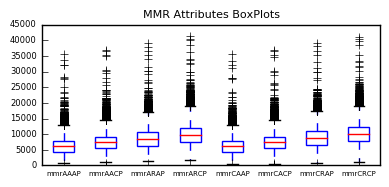

In [120]:
# boxplots for outliers in MMR.. attributes

mmrAAAP = df['MMRAcquisitionAuctionAveragePrice'].tolist()
mmrAAAP = filter(lambda a: a != 0, mmrAAAP) # no zeroes
df = df[df.MMRAcquisitionAuctionAveragePrice != 'NS'] # no NS (previous replacement of NaN)

mmrAACP = df['MMRAcquisitionAuctionCleanPrice'].tolist()
mmrAACP = filter(lambda a: a != 0, mmrAACP) # no zeroes
df = df[df.MMRAcquisitionAuctionCleanPrice != 'NS'] # no NS (previous replacement of NaN)

mmrARAP = df['MMRAcquisitionRetailAveragePrice'].tolist()
mmrARAP = filter(lambda a: a != 0, mmrARAP) # no zeroes
df = df[df.MMRAcquisitionRetailAveragePrice != 'NS'] # no NS (previous replacement of NaN)

mmrARCP = df['MMRAcquisitonRetailCleanPrice'].tolist()
mmrARCP = filter(lambda a: a != 0, mmrARCP) # no zeroes
df = df[df.MMRAcquisitonRetailCleanPrice != 'NS'] # no NS (previous replacement of NaN)

mmrCAAP = df['MMRCurrentAuctionAveragePrice'].tolist()
mmrCAAP = filter(lambda a: a != 0, mmrCAAP) # no zeroes
df = df[df.MMRCurrentAuctionAveragePrice != 'NS'] # no NS (previous replacement of NaN)

mmrCACP = df['MMRCurrentAuctionCleanPrice'].tolist()
mmrCACP = filter(lambda a: a != 0, mmrCACP) # no zeroes
df = df[df.MMRCurrentAuctionCleanPrice != 'NS'] # no NS (previous replacement of NaN)

mmrCRAP = df['MMRCurrentRetailAveragePrice'].tolist()
mmrCRAP = filter(lambda a: a != 0, mmrCRAP) # no zeroes
df = df[df.MMRCurrentRetailAveragePrice != 'NS'] # no NS (previous replacement of NaN)

mmrCRCP = df['MMRCurrentRetailCleanPrice'].tolist()
mmrCRCP = filter(lambda a: a != 0, mmrCRCP) # no zeroes
df = df[df.MMRCurrentRetailCleanPrice != 'NS'] # no NS (previous replacement of NaN)

fig = plt.figure(figsize=(4,2))
ax1 = plt.subplot(111)

x_labels = ['mmrAAAP','mmrAACP','mmrARAP','mmrARCP','mmrCAAP','mmrCACP','mmrCRAP','mmrCRCP']

# data for boxplot (contain all data from MMR attributes)
data = [mmrAAAP,mmrAACP,mmrARAP,mmrARCP,mmrCAAP,mmrCACP,mmrCRAP,mmrCRCP]

ax1.boxplot(data, notch=False, patch_artist=True)
#ax1.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', right='off', left='off', labelleft='off')
ax1.set_xticklabels(x_labels)
ax1.set_title('MMR Attributes BoxPlots',fontsize=8)
ax1.get_xaxis().tick_bottom()
ax1.get_yaxis().tick_left()
ax1.tick_params(axis='x', labelsize=5)
ax1.tick_params(axis='y', labelsize=6)

plt.tight_layout()

# Save plot image
plt.savefig('saved_plots/plots_mmr_boxplots.png')

plt.show()

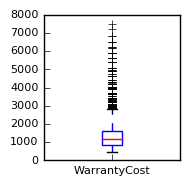

In [115]:
# boxplots warranty

warranties = df['WarrantyCost'].tolist()

fig = plt.figure(figsize=(2,2))
ax1 = plt.subplot(111)

ax1.boxplot(warranties, notch=False, patch_artist=True)
ax1.set_xticklabels(['WarrantyCost'])
#ax1.set_title('WarrantyCost',fontsize=8)
ax1.get_xaxis().tick_bottom()
ax1.get_yaxis().tick_left()
ax1.tick_params(axis='x', labelsize=8)
ax1.tick_params(axis='y', labelsize=8)

plt.tight_layout()

# Save plot image
plt.savefig('saved_plots/plots_warranty_boxplot.png')

plt.show()

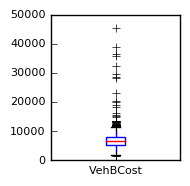

In [117]:
# boxplots vehcost
vehcost = df['VehBCost'].tolist()

fig = plt.figure(figsize=(2,2)) 
ax1 = plt.subplot(111)

ax1.boxplot(vehcost, notch=False, patch_artist=True) 
ax1.set_xticklabels(['VehBCost'])
#ax1.set_title('VehBCost',fontsize=8) 
ax1.get_xaxis().tick_bottom() 
ax1.get_yaxis().tick_left() 
ax1.tick_params(axis='x', labelsize=8) 
ax1.tick_params(axis='y', labelsize=8)

plt.tight_layout()

# Save plot image
plt.savefig('saved_plots/plots_vehcost_boxplot.png')

plt.show()